# Earthquake dataset

**We will build a machine learning model to predict the magnitude of an earthquake**

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
df = pd.read_csv('/content/Earthquake.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(7)

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0   1/2/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1   1/4/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2   1/5/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3   1/8/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4   1/9/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   
5  1/10/1965  13:36:32   -13.405    166.629  Earthquake   35.0          NaN   
6  1/12/1965  13:32:25    27.357     87.867  Earthquake   20.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0                     NaN        6.0             MW              NaN   
1                     NaN        5.8             MW              NaN   
2                     NaN        6.2             MW              NaN   
3                     NaN        5.8             MW              NaN   
4                     NaN        5.8             MW              NaN   
5                     NaN        6.7             MW              NaN   
6                     NaN        5.9             MW              NaN   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   
5                         NaN            NaN                  NaN   
6                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   
5               NaN               NaN  ISCGEM860922  ISCGEM          ISCGEM   
6               NaN               NaN  ISCGEM861007  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  
5           ISCGEM  Automatic  
6           ISCGEM  Automatic

### Retrieving information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

The dataset has **9 categorical columns** and **12 numerical columns**. Some columns have missing values. The shape of the dataframe shows that there **23412 rows** in the dataset and **21 columns/features**

### Description of the dataset

In [6]:
df.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7299.000000          1604.000000   
mean                    48.944618      44.163532             3.992660   
std                     62.943106      32.141486             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17352.000000  
mean           7.662759          1.022784  
std           10.430396          0.188545  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

The above results displays the description of the numeric columns in the dataset

In [7]:
df.describe(include=['O'])

Date     Time        Type Magnitude Type            ID Source  \
count       23412    23412       23412          23409         23412  23412   
unique      12401    20472           4             10         23412     13   
top     3/11/2011  2:56:58  Earthquake             MW  ISCGEM860706     US   
freq          128        5       23232           7722             1  20630   

       Location Source Magnitude Source    Status  
count            23412            23412     23412  
unique              48               24         2  
top                 US               US  Reviewed  
freq             20350            10458     20773

The above results displays the description of the categorical columns in the dataset

In [8]:
df.shape

(23412, 21)

### Data Leakage

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called **data leakage**.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Now we will check for duplicates

In [9]:
df.duplicated().sum()

0

*There are no duplicate rows*

#### Splitting the dataset into training and testing datasets

In [10]:
X = df.drop(columns=["Magnitude"], axis=1)
Y = df.Magnitude

In [11]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle=True)

Joining the training dataframe

In [12]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [13]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [14]:
df_train.reset_index(inplace = True, drop = True)

In [15]:
df_test.reset_index(inplace = True, drop = True)

The indices have been reset in the training and testing dataframes

## Data Preprocessing and cleaning in the training dataframe

Checking if there is any missing value in the training dataframe

In [16]:
df_train.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   15153
Depth Seismic Stations        13067
Magnitude Type                    2
Magnitude Error               18458
Magnitude Seismic Stations    16660
Azimuthal Gap                 12873
Horizontal Distance           17427
Horizontal Error              17786
Root Mean Square               4848
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
Magnitude                         0
dtype: int64

In [17]:
(df_train.isnull().sum()/len(df_train))

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809066
Depth Seismic Stations        0.697688
Magnitude Type                0.000107
Magnitude Error               0.985530
Magnitude Seismic Stations    0.889530
Azimuthal Gap                 0.687330
Horizontal Distance           0.930482
Horizontal Error              0.949650
Root Mean Square              0.258850
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
Magnitude                     0.000000
dtype: float64

There are high number of **missing values** in the columns **Depth Error**, **Magnitude Error**, **Magnitude Seismic Stations**, **Horizontal Distance** and **Horizontal Error**. We can drop these columns as they have large number of missing values. 

For **Depth Seismic Stations**, **Azimuthal Gap** and **Root Mean Square** columns, we can impute the missing values with mean/median value depending upon the distribution.

For the column **Magnitude Type**, there are only 2 missing values. Thus we can drop the rows corresponding to these 2 missing values

In [18]:
for feature in df_train.columns:
  if (df_train[feature].isnull().sum()/len(df_train))*100 > 90:
    df_train = df_train.drop([feature], axis=1)
  elif (df_train[feature].isnull().sum()/len(df_train))*100 <= 1:
    df_train = df_train.dropna(subset=[feature])

In [19]:
(df_train.isnull().sum()/len(df_train))

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809046
Depth Seismic Stations        0.697656
Magnitude Type                0.000000
Magnitude Seismic Stations    0.889518
Azimuthal Gap                 0.687296
Root Mean Square              0.258771
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
Magnitude                     0.000000
dtype: float64

#### Extracting the features having missing values which need to be imputed

In [20]:
NaN_features = [feature for feature in df_train.columns if (df_train[feature].count() < df_train.shape[0])]
NaN_features

['Depth Error',
 'Depth Seismic Stations',
 'Magnitude Seismic Stations',
 'Azimuthal Gap',
 'Root Mean Square']

The above 3 are the features that require imputation

#### Plotting histogram and distplots for features need to be imputed

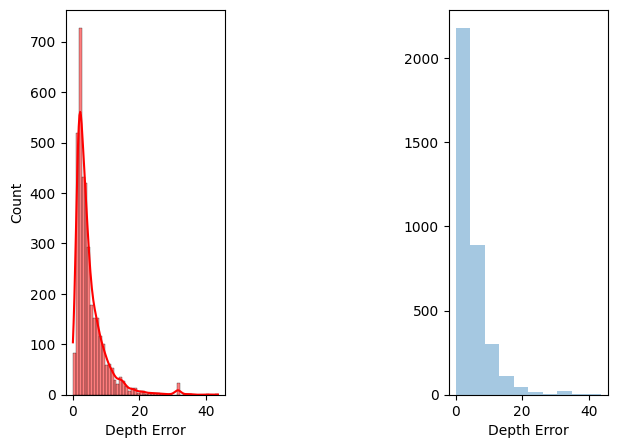

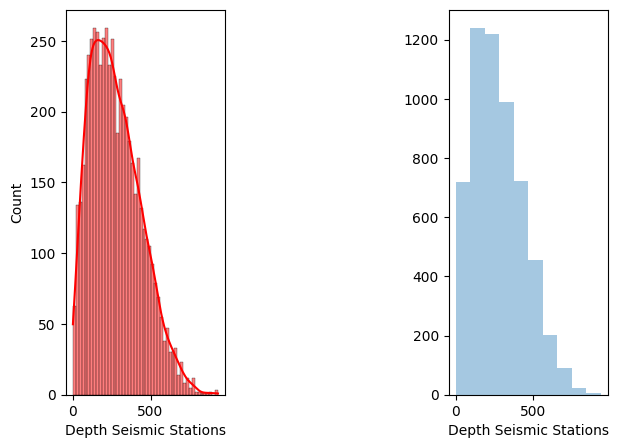

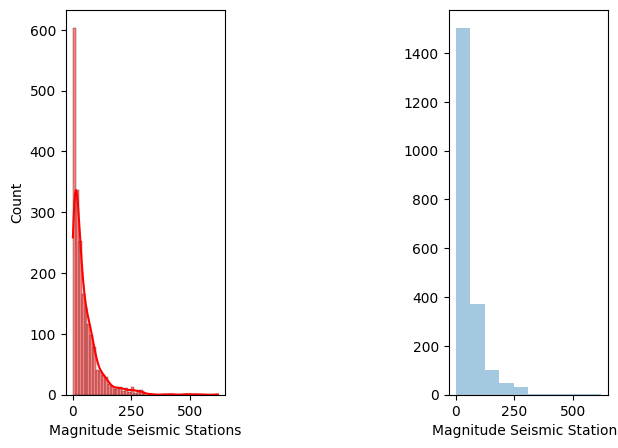

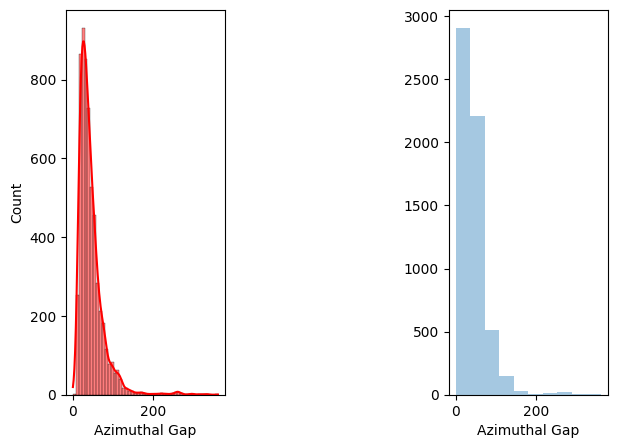

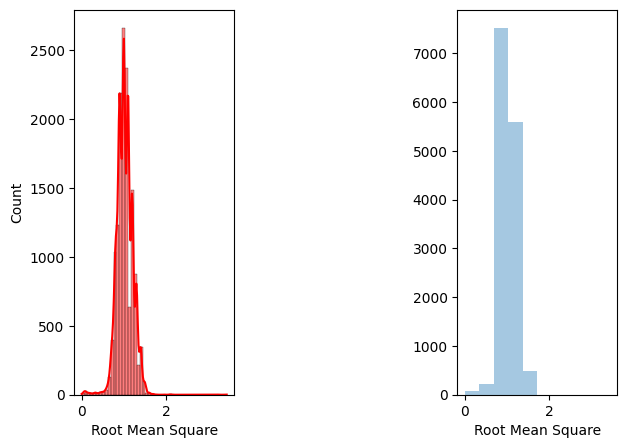

In [21]:
for feature in NaN_features:
    plt.figure(figsize=(7,5))
    plt.subplot(1,3,1)
    #sns.distplot(df_train[feature], color='red')
    sns.histplot(x = df_train[feature].dropna(), kde = True, color='red', bins=50)
    plt.subplot(1,3,3)
    #plt.hist(df_train[feature], bins=20)
    sns.distplot(df_train[feature], bins=10, kde = False)

It can be observed that the features plotted above are skewed. Thus, we can use respective **median** values to impute them

Number of unique values in the respective columns

In [22]:
df_train.nunique()

Date                          10989
Time                          16826
Latitude                      16935
Longitude                     17487
Type                              4
Depth                          3054
Depth Error                     271
Depth Seismic Stations          717
Magnitude Type                   10
Magnitude Seismic Stations      241
Azimuthal Gap                  1039
Root Mean Square                178
ID                            18727
Source                           12
Location Source                  43
Magnitude Source                 23
Status                            2
Magnitude                        60
dtype: int64

We can see there are 4 unique values in the **Type** column. We can check the missing values in the required columns corresponding to the **Type** column using **Boxplot**

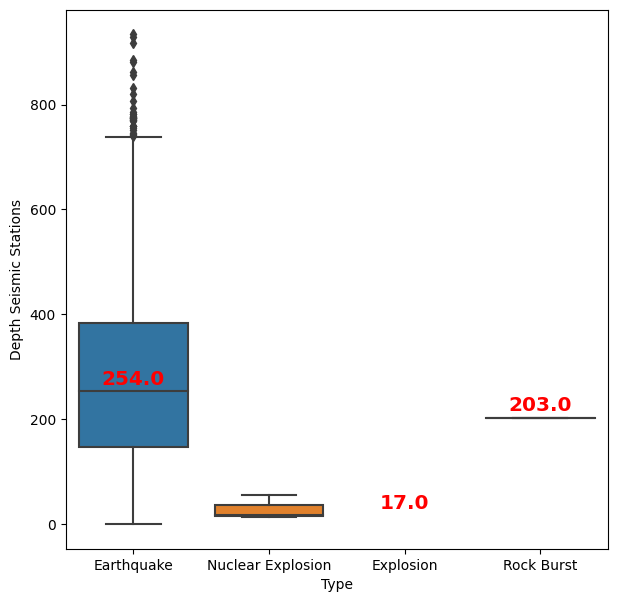

In [23]:
plt.figure(figsize=(7,7))
box_plot = sns.boxplot(x='Type', y='Depth Seismic Stations', data=df_train)

medians = df_train.groupby(['Type'])['Depth Seismic Stations'].median()
vertical_offset = df_train['Depth Seismic Stations'].median()*0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-large',color='r',weight='semibold')

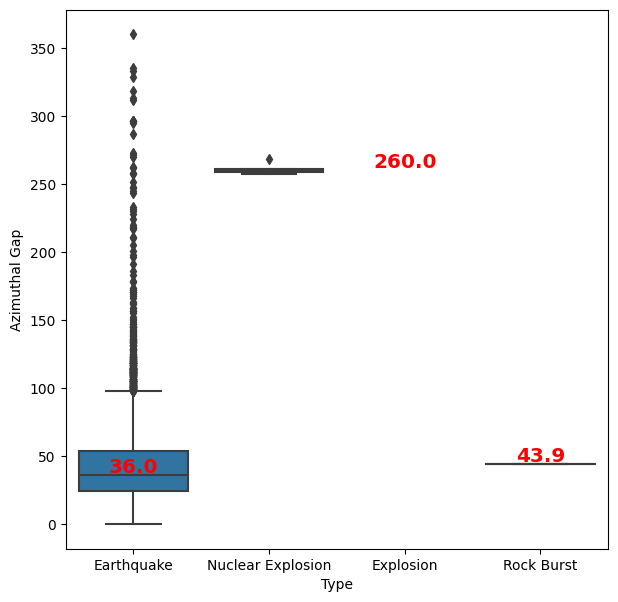

In [24]:
plt.figure(figsize=(7,7))
box_plot = sns.boxplot(x='Type', y='Azimuthal Gap', data=df_train)

medians = df_train.groupby(['Type'])['Azimuthal Gap'].median()
vertical_offset = df_train['Azimuthal Gap'].median()*0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-large',color='r',weight='semibold')

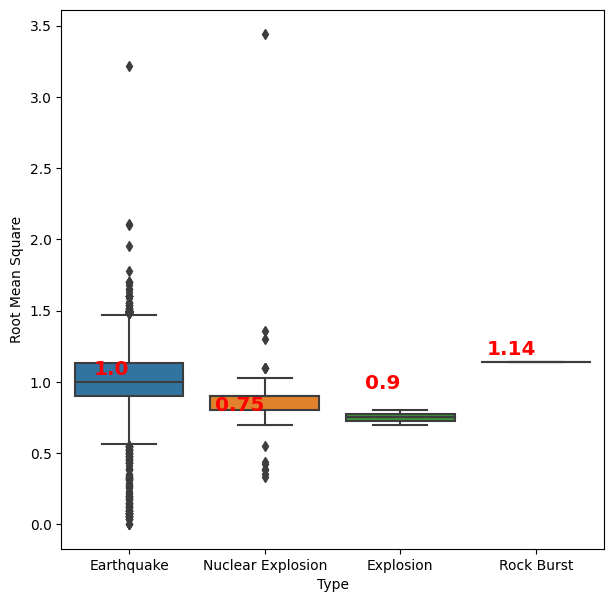

In [25]:
plt.figure(figsize=(7,7))
box_plot = sns.boxplot(x='Type', y='Root Mean Square', data=df_train)

medians = df_train.groupby(['Type'])['Root Mean Square'].median()
vertical_offset = df_train['Root Mean Square'].median()*0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='right',size='x-large',color='r',weight='semibold')

The above boxplots reveal the **median values** for the respective **Type** categories corresponding to the respective feature variable having **missing values**

In [26]:
df_train['Type'].value_counts()

Earthquake           18581
Nuclear Explosion      141
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [27]:
df_train['Type'].value_counts().sum()

18727

The missing values in the **Depth Seismic Stations** column corresponding to the **Type** column values

In [28]:
df_train[df_train['Depth Seismic Stations'].isnull()].Type.value_counts()

Earthquake           12931
Nuclear Explosion      130
Explosion                4
Name: Type, dtype: int64

**Nuclear Explosion** can be considered as a kind of explosion and thus fall into the category of **Explosion**

In [29]:
df_train["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

In [30]:
df_train["Type"].replace({"Rock Burst": "Explosion"}, inplace=True)

In [31]:
df_train[df_train['Depth Seismic Stations'].isnull()].Type.value_counts()

Earthquake    12931
Explosion       134
Name: Type, dtype: int64

In [32]:
df_train[df_train['Azimuthal Gap'].isnull()].Type.value_counts()

Earthquake    12737
Explosion       134
Name: Type, dtype: int64

In [33]:
df_train[df_train['Root Mean Square'].isnull()].Type.value_counts()

Earthquake    4792
Explosion       54
Name: Type, dtype: int64

In [34]:
df_train[df_train['Depth Error'].isnull()].Type.value_counts()

Earthquake    15016
Explosion       135
Name: Type, dtype: int64

In [35]:
df_train[df_train['Depth Seismic Stations'].isnull()].Type.value_counts()

Earthquake    12931
Explosion       134
Name: Type, dtype: int64

Defining function to impute the missing values

In [36]:
def impute_dataset(dataset, categoricalColumn):
  for feature in NaN_features:
    for col in dataset[categoricalColumn].value_counts().keys().tolist():
      #print('Before', feature, col, df_train[feature][df_train[categoricalColumn] == col].median())
      #df_train[feature] = df_train[feature].fillna(df_train[feature].median())
      dataset[feature][dataset[categoricalColumn]==col] = dataset[feature][dataset[categoricalColumn]==col].fillna(dataset[feature][dataset[categoricalColumn] == col].median())
      #print('After', feature, col, df_train[feature][df_train[categoricalColumn] == col].median())

In [37]:
impute_dataset(df_train, 'Type')

In [38]:
df_train[df_train['Depth Seismic Stations'].isnull()].Type.value_counts()

Series([], Name: Type, dtype: int64)

In [39]:
df_train[df_train['Azimuthal Gap'].isnull()].Type.value_counts()

Series([], Name: Type, dtype: int64)

In [40]:
df_train.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude Type                0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Root Mean Square              0
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
Magnitude                     0
dtype: int64

There are no missing values anymore

#### Checking for unique values

In [41]:
df_train.nunique()

Date                          10989
Time                          16826
Latitude                      16935
Longitude                     17487
Type                              2
Depth                          3054
Depth Error                     271
Depth Seismic Stations          717
Magnitude Type                   10
Magnitude Seismic Stations      242
Azimuthal Gap                  1039
Root Mean Square                178
ID                            18727
Source                           12
Location Source                  43
Magnitude Source                 23
Status                            2
Magnitude                        60
dtype: int64

In [42]:
df_train.shape

(18727, 18)

*The **ID column** has all almost **unique values** and thus it does not contribute to determine the magnitude of the earthquake. So we can drop the ID column*

In [43]:
df_train = df_train.drop(['ID'], axis = 1)

In [44]:
df_train.shape

(18727, 17)

The **ID** column has been dropped

#### Extracting the predictor continuous features from the training data

In [45]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['Magnitude']]

In [46]:
continuous_features

['Latitude',
 'Longitude',
 'Depth',
 'Depth Error',
 'Depth Seismic Stations',
 'Magnitude Seismic Stations',
 'Azimuthal Gap',
 'Root Mean Square']

#### Plotting Boxplot and Q-Q plot to identify Univariate outliers

In [47]:
import scipy.stats as stat
import pylab

In [48]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
      plt.figure(figsize=(5,5))
      plt.ticklabel_format(style='plain')
      plt.suptitle("Boxplot and Q-Q plot of " + feature, fontweight="bold", fontsize=15)
      #dataset.boxplot(column=feature)
      plt.subplot(2,3,1)
      sns.boxplot(y=feature, data=dataset, color='orange')
      #plt.ylabel(feature)
      #plt.title(feature)
      plt.subplot(2,3,3)
      stat.probplot(dataset[feature], dist='norm', plot=pylab)
      plt.show()

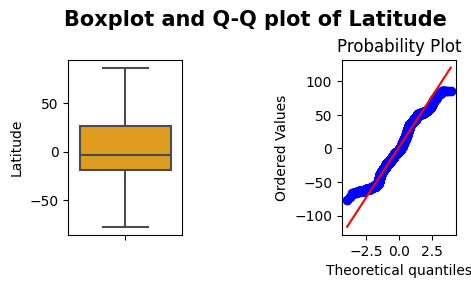

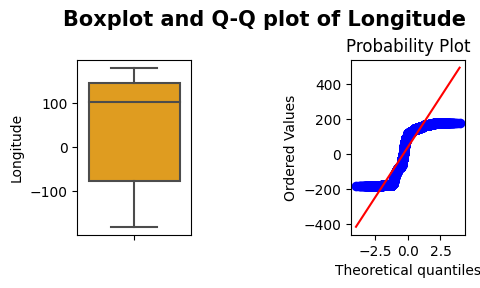

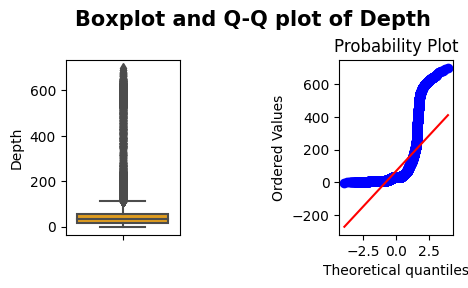

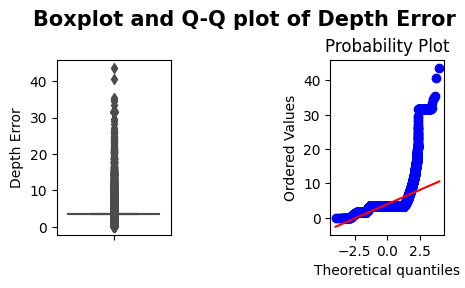

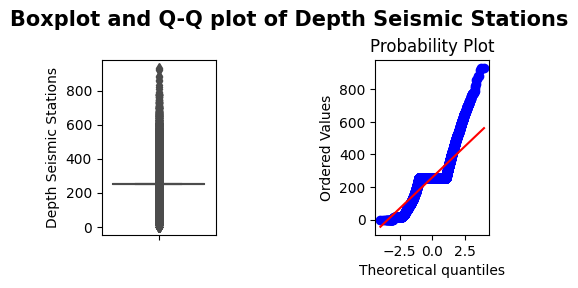

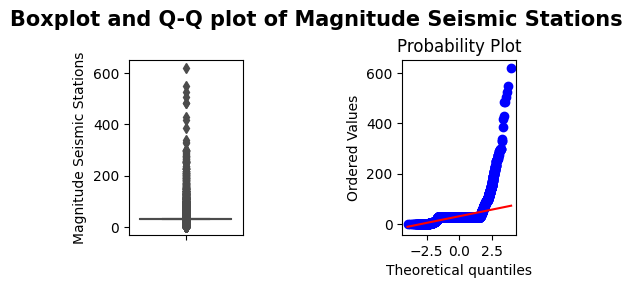

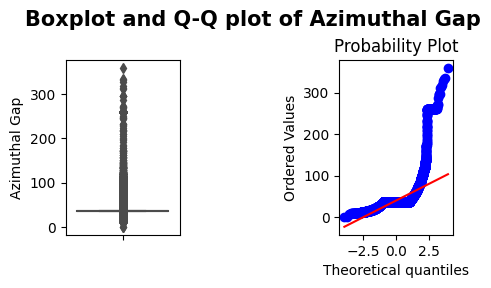

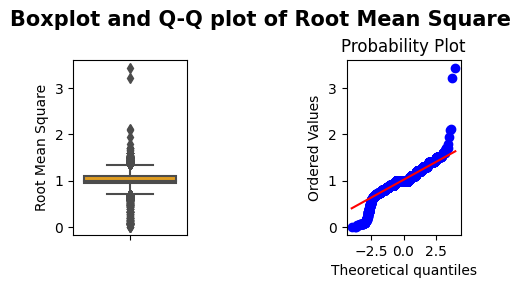

In [49]:
create_boxplots(df_train, continuous_features)

Defining function to remove the univariate outliers

In [50]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        #print(feature, lower_bridge)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        #print(feature, upper_bridge)
        if lower_bridge != upper_bridge:
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge
        else:
          lower_bridge = dataset[feature].quantile(0.25)/2
          upper_bridge = dataset[feature].quantile(0.75) * 2
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [51]:
remove_outliers(df_train, continuous_features)

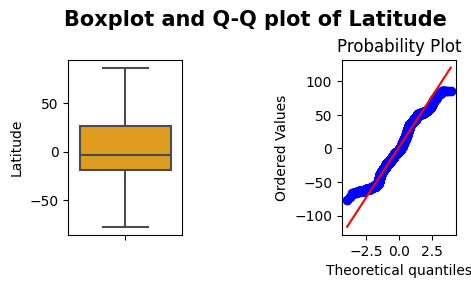

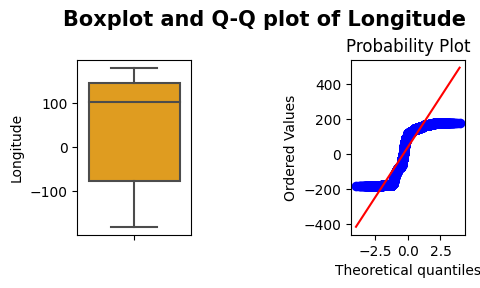

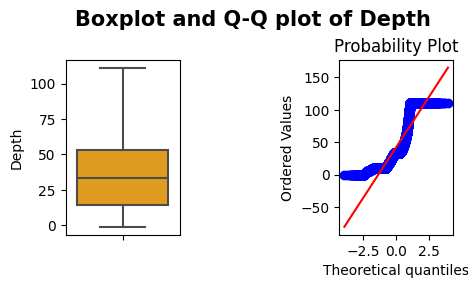

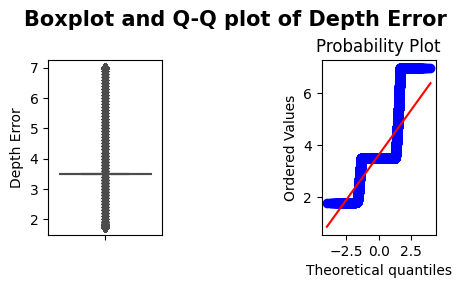

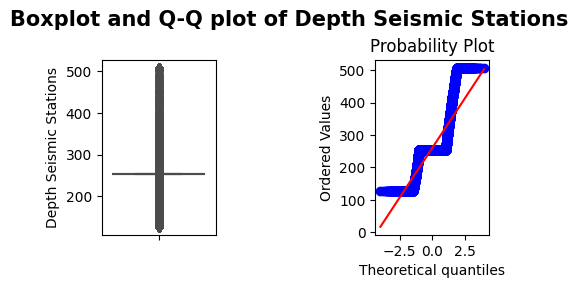

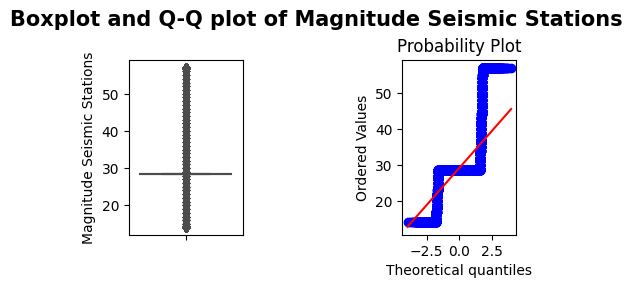

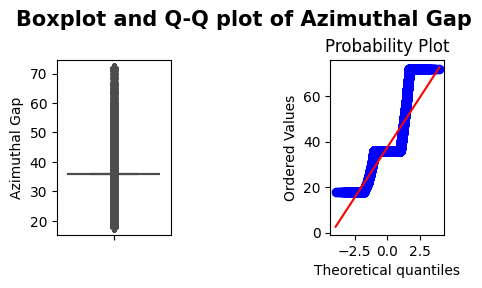

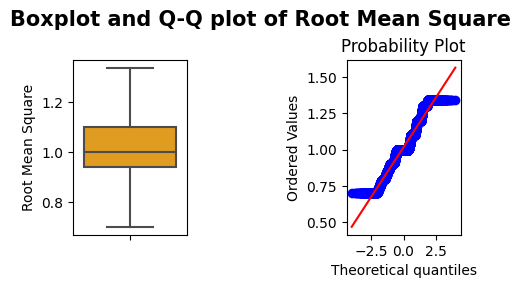

In [52]:
create_boxplots(df_train, continuous_features)

The univariate outliers have been treated

In [53]:
df_train.describe()

Latitude     Longitude         Depth   Depth Error  \
count  18727.000000  18727.000000  18727.000000  18727.000000   
mean       1.766155     39.589574     42.135634      3.618906   
std       30.180708    125.377510     34.466601      0.963338   
min      -77.080000   -179.993000     -1.100000      1.750000   
25%      -18.676000    -76.314650     14.200000      3.500000   
50%       -3.508000    103.162000     33.000000      3.500000   
75%       26.570500    145.103500     53.000000      3.500000   
max       86.005000    179.998000    111.200000      7.000000   

       Depth Seismic Stations  Magnitude Seismic Stations  Azimuthal Gap  \
count            18727.000000                18727.000000   18727.000000   
mean               260.022321                   29.172785      37.559392   
std                 74.026130                    6.549738      10.784149   
min                127.000000                   14.250000      18.000000   
25%                254.000000                   28.500000      36.000000   
50%                254.000000                   28.500000      36.000000   
75%                254.000000                   28.500000      36.000000   
max                508.000000                   57.000000      72.000000   

       Root Mean Square     Magnitude  
count      18727.000000  18727.000000  
mean           1.016406      5.881359  
std            0.142158      0.421455  
min            0.700000      5.500000  
25%            0.940000      5.600000  
50%            1.000000      5.700000  
75%            1.100000      6.000000  
max            1.340000      9.100000

In [54]:
df_train.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  11/29/2007  19:00:20    14.944    -61.274  Earthquake  111.2          3.5   
1  10/28/2011  18:54:34   -14.438    -75.966  Earthquake   24.0          3.5   
2   3/25/2007  13:57:58    38.340     20.420  Earthquake   15.0          3.5   
3    5/6/2004  13:43:13    42.525    145.021  Earthquake   28.6          3.5   
4   8/27/1988  16:30:17   -15.864   -172.067  Earthquake   27.9          3.5   

   Depth Seismic Stations Magnitude Type  Magnitude Seismic Stations  \
0                   508.0            MWB                        28.5   
1                   474.0            MWW                        28.5   
2                   508.0            MWB                        28.5   
3                   503.0            MWB                        28.5   
4                   254.0             MW                        28.5   

   Azimuthal Gap  Root Mean Square Source Location Source Magnitude Source  \
0           18.0              0.74     US              US               US   
1           46.5              1.00     US              US               US   
2           35.4              1.00     US             ATH               US   
3           72.0              0.80     US              US               US   
4           36.0              0.90     US              US              HRV   

     Status  Magnitude  
0  Reviewed        7.4  
1  Reviewed        6.9  
2  Reviewed        5.7  
3  Reviewed        5.5  
4  Reviewed        5.7

#### Plotting histograms and distplots to check the distributions of continuous variables

In [55]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.suptitle("Histogram and Q-Q plot of variable " + feature, fontweight="bold", fontsize=15)
        plt.subplot(3,5,1)
        plt.ticklabel_format(style='plain')
        #plt.hist(dataset[feature].dropna())
        sns.histplot(x = dataset[feature].dropna(), kde = True)
        plt.title(feature)
        plt.subplot(3,5,3)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.ylabel('Count/Frequency')
        plt.subplot(3,5,5)
        stat.probplot(dataset[feature], dist='norm', plot=pylab)
        plt.show()

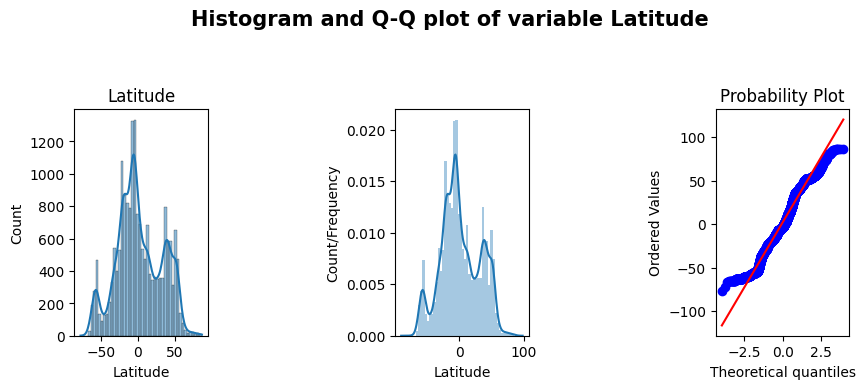

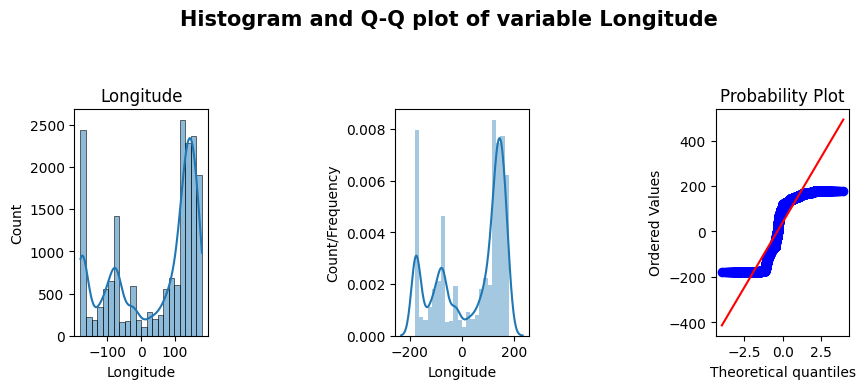

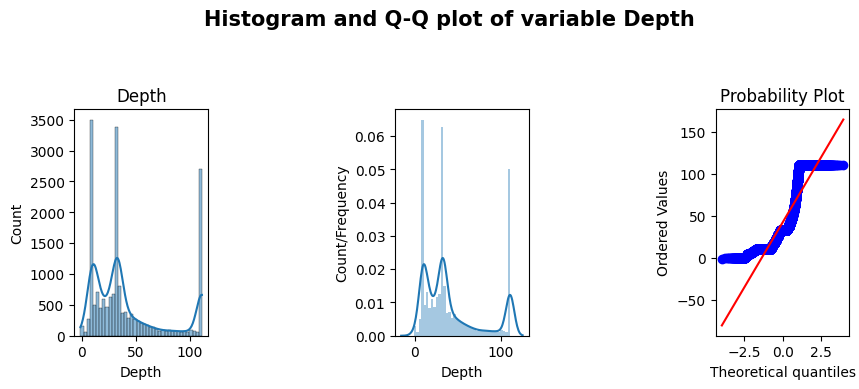

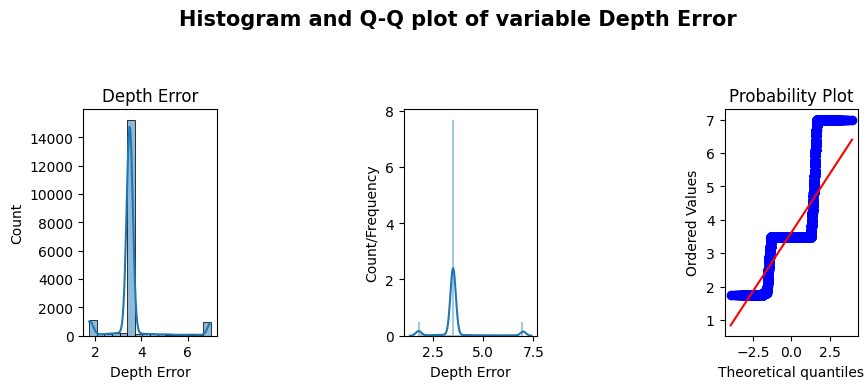

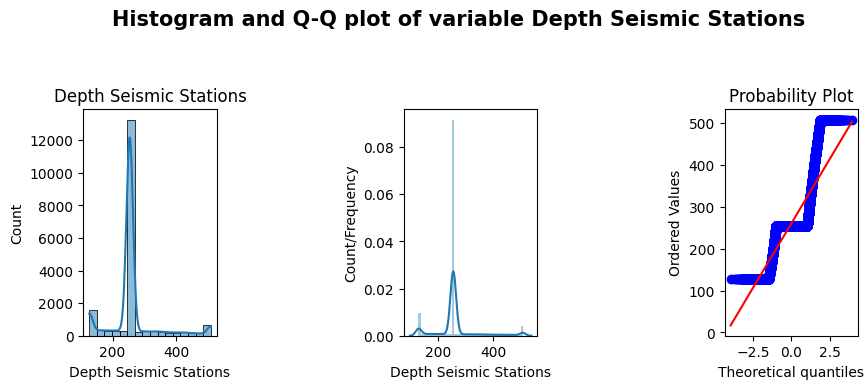

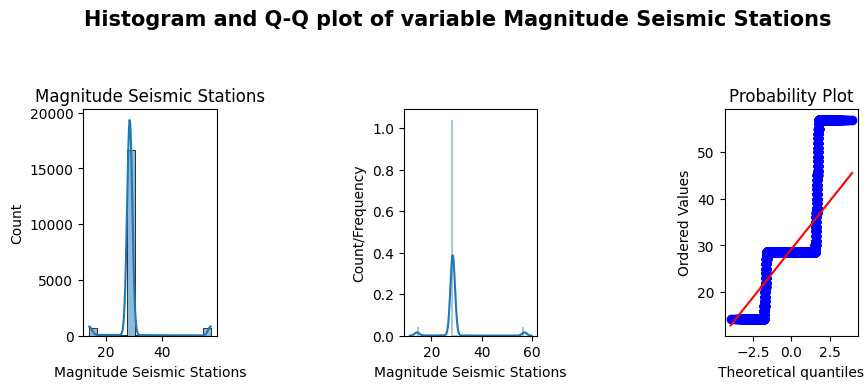

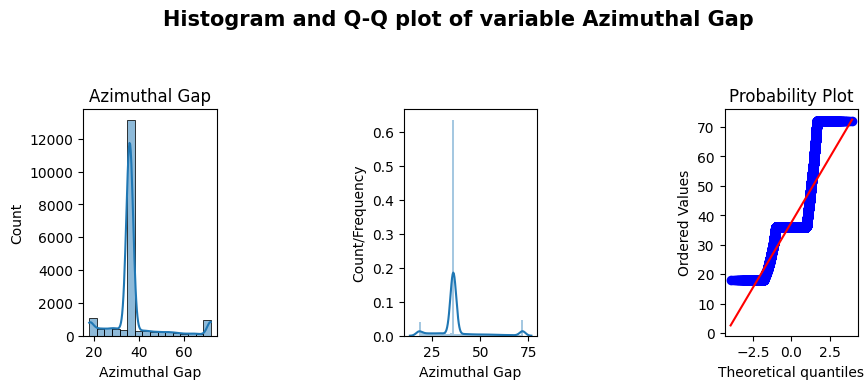

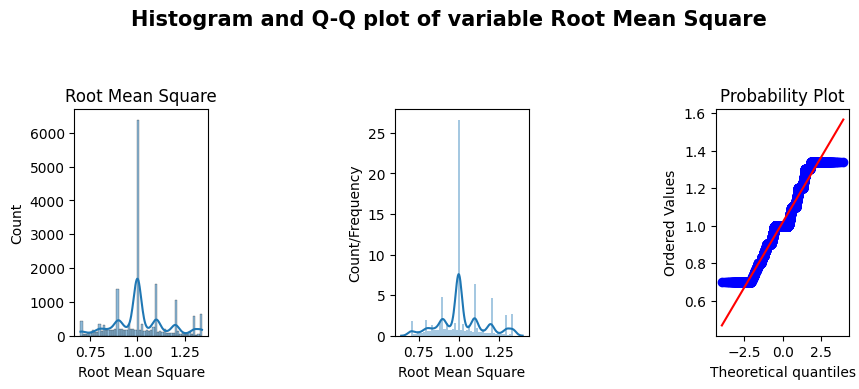

In [56]:
create_histograms_distplots(df_train, continuous_features)

From the above plots, it can observed that the features are skewed

#### Performing transformation to remove skeweness

In [57]:
from scipy.stats import skew

In [58]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    square_root_transformed_skew_scores = []
    log_transformed_skew_scores = []
    #exp_transformed_skew_scores = []
    #boxcox_transformed_skew_scores = []
    for feature in feature_list:
      column_name_square_root = ''
      column_name_log = ''
      variables.append(feature)
      skew_scores.append(skew(dataset[feature]))
      #print(feature, skew(dataset[feature]))
      if (float(skew(dataset[feature])) >= 0.5) | (float(skew(dataset[feature])) <= -0.5): 
        if dataset[feature].min() > 0:
          #column_name_square_root = f'{str(feature)} square root transformed'
          #dataset[column_name_square_root] = np.sqrt(dataset[feature])
          #column_name_log = f'{str(feature)} log transformed'
          #dataset[column_name_log] = np.log(dataset[feature])
          dataset[feature] = np.log(dataset[feature])
          #square_root_transformed_skew_scores.append(skew(dataset[column_name_square_root]))
          #log_transformed_skew_scores.append(skew(dataset[column_name_log]))
          log_transformed_skew_scores.append(skew(dataset[feature]))
        else:
          #square_root_transformed_skew_scores.append('Not transformed')
          log_transformed_skew_scores.append('Not transformed')
        #column_name_exp = f'{str(feature)} exp transformed'
        #dataset[feature] = np.exp(dataset[feature])
        #exp_transformed_skew_scores.append(skew(dataset[feature]))
        #boxcox_transformed_skew_scores.append(skew(dataset[column_name_exp]))
      else:
        #pass
        #square_root_transformed_skew_scores.append('Not transformed')
        log_transformed_skew_scores.append('Not transformed')
        #exp_transformed_skew_scores.append('Not transformed')
        #boxcox_transformed_skew_scores.append('Not transformed')
    #print(len(variables))
    #print(len(skew_scores))
    #print(len(square_root_transformed_skew_scores))
    #print(len(log_transformed_skew_scores))
    #print(skew_scores)
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores, 'Skewness score after boxcox transformation of skewed features': boxcox_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores}
    skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [59]:
skewness_score(df_train, continuous_features)

Feature  Skewness Score before transformation  \
0                    Latitude                              0.093417   
1                   Longitude                             -0.598407   
2                       Depth                              1.064064   
3                 Depth Error                              2.016424   
4      Depth Seismic Stations                              1.366406   
5  Magnitude Seismic Stations                              2.658253   
6               Azimuthal Gap                              1.652788   
7            Root Mean Square                              0.260787   

  Skewness score after log transformation of skewed features  
0                                    Not transformed          
1                                    Not transformed          
2                                    Not transformed          
3                                           0.016618          
4                                          -0.308543          
5                                           0.062859          
6                                           0.104173          
7                                    Not transformed

The skewness has been handled using **Log transformation**

In [60]:
df_train.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  11/29/2007  19:00:20    14.944    -61.274  Earthquake  111.2     1.252763   
1  10/28/2011  18:54:34   -14.438    -75.966  Earthquake   24.0     1.252763   
2   3/25/2007  13:57:58    38.340     20.420  Earthquake   15.0     1.252763   
3    5/6/2004  13:43:13    42.525    145.021  Earthquake   28.6     1.252763   
4   8/27/1988  16:30:17   -15.864   -172.067  Earthquake   27.9     1.252763   

   Depth Seismic Stations Magnitude Type  Magnitude Seismic Stations  \
0                6.230481            MWB                    3.349904   
1                6.161207            MWW                    3.349904   
2                6.230481            MWB                    3.349904   
3                6.220590            MWB                    3.349904   
4                5.537334             MW                    3.349904   

   Azimuthal Gap  Root Mean Square Source Location Source Magnitude Source  \
0       2.890372              0.74     US              US               US   
1       3.839452              1.00     US              US               US   
2       3.566712              1.00     US             ATH               US   
3       4.276666              0.80     US              US               US   
4       3.583519              0.90     US              US              HRV   

     Status  Magnitude  
0  Reviewed        7.4  
1  Reviewed        6.9  
2  Reviewed        5.7  
3  Reviewed        5.5  
4  Reviewed        5.7

In [61]:
df_train.describe()

Latitude     Longitude         Depth   Depth Error  \
count  18727.000000  18727.000000  18727.000000  18727.000000   
mean       1.766155     39.589574     42.135634      1.255557   
std       30.180708    125.377510     34.466601      0.244763   
min      -77.080000   -179.993000     -1.100000      0.559616   
25%      -18.676000    -76.314650     14.200000      1.252763   
50%       -3.508000    103.162000     33.000000      1.252763   
75%       26.570500    145.103500     53.000000      1.252763   
max       86.005000    179.998000    111.200000      1.945910   

       Depth Seismic Stations  Magnitude Seismic Stations  Azimuthal Gap  \
count            18727.000000                18727.000000   18727.000000   
mean                 5.522620                    3.352114       3.589643   
std                  0.278318                    0.202382       0.266329   
min                  4.844187                    2.656757       2.890372   
25%                  5.537334                    3.349904       3.583519   
50%                  5.537334                    3.349904       3.583519   
75%                  5.537334                    3.349904       3.583519   
max                  6.230481                    4.043051       4.276666   

       Root Mean Square     Magnitude  
count      18727.000000  18727.000000  
mean           1.016406      5.881359  
std            0.142158      0.421455  
min            0.700000      5.500000  
25%            0.940000      5.600000  
50%            1.000000      5.700000  
75%            1.100000      6.000000  
max            1.340000      9.100000

#### Now we will perform bivariate analysis by plotting relplot

In [62]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(7,7))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

<Figure size 700x700 with 0 Axes>

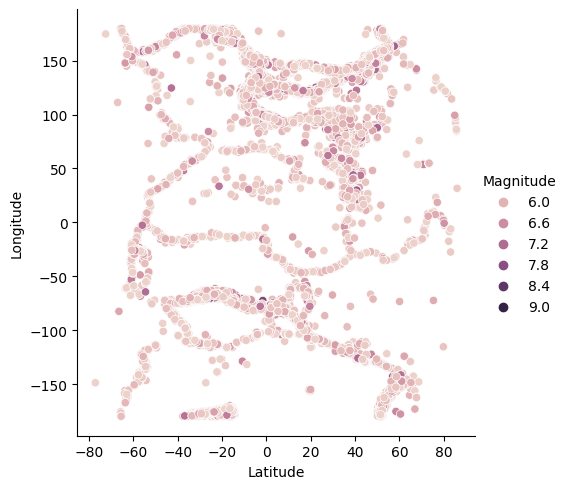

<Figure size 700x700 with 0 Axes>

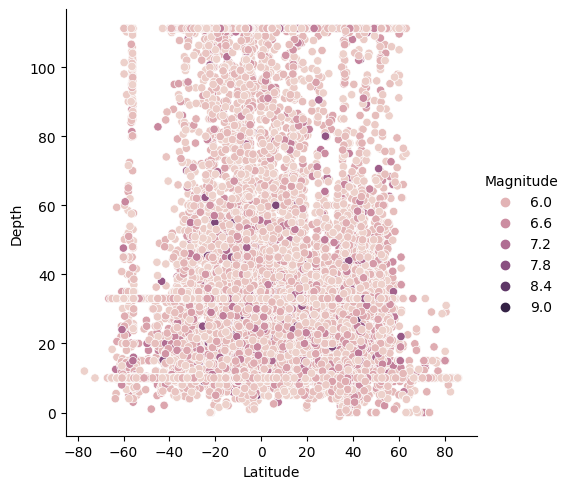

<Figure size 700x700 with 0 Axes>

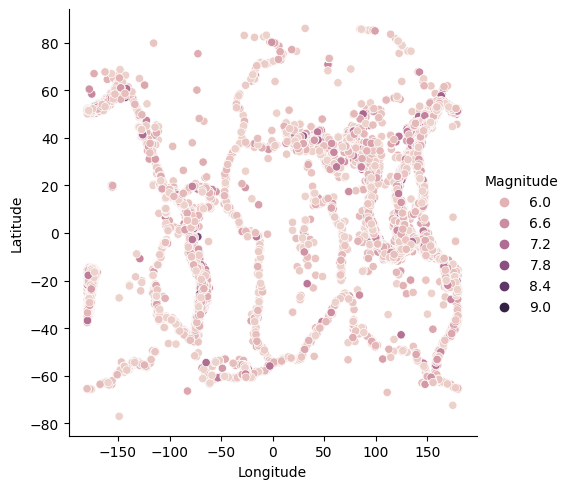

<Figure size 700x700 with 0 Axes>

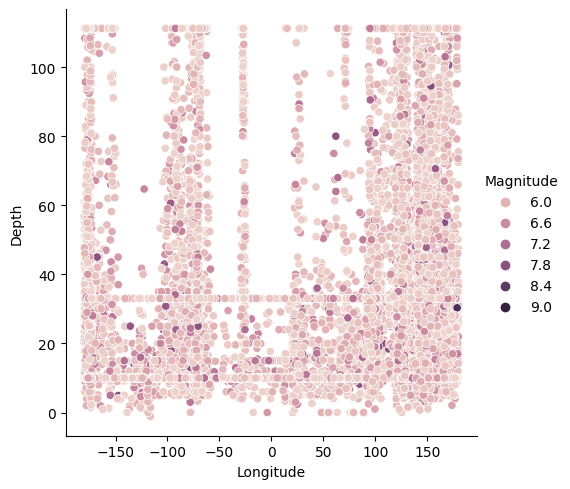

<Figure size 700x700 with 0 Axes>

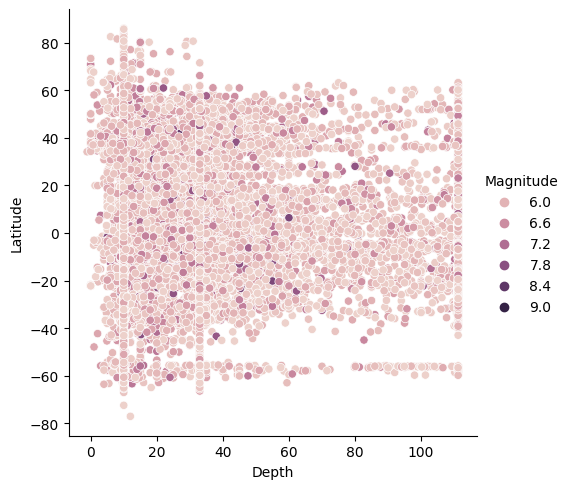

<Figure size 700x700 with 0 Axes>

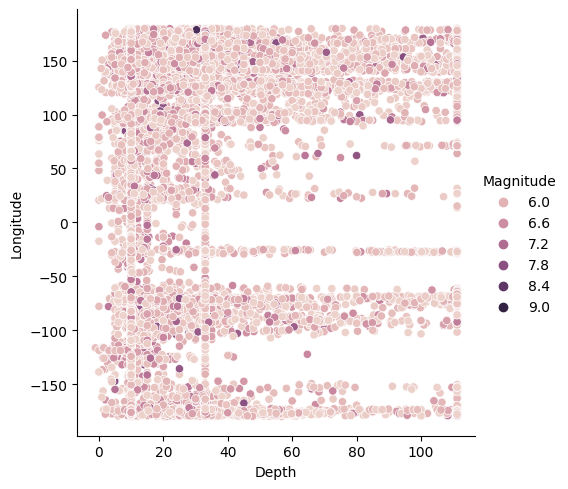

In [63]:
create_relplot(df_train, continuous_features[:3], 'Magnitude')

#### Plotting FacetGrids

In [64]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='Magnitude Source', row='Location Source')
        v.map(plt.hist, feature)

In [65]:
#create_FacetGrid(df_train, ['Latitude', 'Longitude', 'Depth', 'Root Mean Square'])

Processing the **Date** variable

In [66]:
df_train[df_train['Date'] == '1985-04-28T02:53:41.530Z']

Date                      Time  Latitude  Longitude  \
7746  1985-04-28T02:53:41.530Z  1985-04-28T02:53:41.530Z   -32.998    -71.766   

            Type  Depth  Depth Error  Depth Seismic Stations Magnitude Type  \
7746  Earthquake   33.0     1.252763                5.537334             MW   

      Magnitude Seismic Stations  Azimuthal Gap  Root Mean Square Source  \
7746                    3.349904       3.583519               1.3     US   

     Location Source Magnitude Source    Status  Magnitude  
7746              US              HRV  Reviewed        5.6

In [67]:
df_train[df_train['Date'] == '1975-02-23T02:58:41.000Z']

Date                      Time  Latitude  Longitude  \
7708  1975-02-23T02:58:41.000Z  1975-02-23T02:58:41.000Z     8.017    124.075   

            Type  Depth  Depth Error  Depth Seismic Stations Magnitude Type  \
7708  Earthquake  111.2     1.252763                5.537334             MB   

      Magnitude Seismic Stations  Azimuthal Gap  Root Mean Square Source  \
7708                    3.349904       3.583519               1.0     US   

     Location Source Magnitude Source    Status  Magnitude  
7708              US               US  Reviewed        5.6

It can be seen that there are some **Date** values that require processing/cleaning

#### Importing Regular Expression library

In [68]:
import re

In [69]:
df_train['Date'] = [re.sub('T02:[0-9]+:[0-9]+.[0-9]+Z', '', e) for e in df_train['Date']]
df_train['Date'] = [re.sub('-', '/', e) for e in df_train['Date']]

In [70]:
for e in df_train['Date']:
  l = []
  matcher = re.finditer('\d{4}/\d{2}', e)
  for m in matcher:
    l = e.split('/')
    df_train['Date'][df_train['Date'] == e] = f'{l[1]}/{l[2]}/{l[0]}'

We will use **to_datetime** function of pandas library to convert dates having object data type to datetime object

In [71]:
df_train['Day'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.day

In [72]:
df_train['Month'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.month

In [73]:
df_train['Year'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.year

Dropping the **Date** column

In [74]:
df_train.drop(['Date'], axis=1, inplace=True)

Processing the **Time** variable

In [75]:
df_train[df_train['Time'] == '1985-04-28T02:53:41.530Z']

Time  Latitude  Longitude        Type  Depth  \
7746  1985-04-28T02:53:41.530Z   -32.998    -71.766  Earthquake   33.0   

      Depth Error  Depth Seismic Stations Magnitude Type  \
7746     1.252763                5.537334             MW   

      Magnitude Seismic Stations  Azimuthal Gap  Root Mean Square Source  \
7746                    3.349904       3.583519               1.3     US   

     Location Source Magnitude Source    Status  Magnitude  Day  Month  Year  
7746              US              HRV  Reviewed        5.6   28      4  1985

In [76]:
df_train[df_train['Time'] == '1975-02-23T02:58:41.000Z']

Time  Latitude  Longitude        Type  Depth  \
7708  1975-02-23T02:58:41.000Z     8.017    124.075  Earthquake  111.2   

      Depth Error  Depth Seismic Stations Magnitude Type  \
7708     1.252763                5.537334             MB   

      Magnitude Seismic Stations  Azimuthal Gap  Root Mean Square Source  \
7708                    3.349904       3.583519               1.0     US   

     Location Source Magnitude Source    Status  Magnitude  Day  Month  Year  
7708              US               US  Reviewed        5.6   23      2  1975

In [77]:
df_train['Time'] = [re.sub('[0-9]+-[0-9]+-[0-9]+T', '', e) for e in df_train['Time']]

In [78]:
df_train['Time'] = [re.sub('[.][0-9]+Z', '', e) for e in df_train['Time']]

In [79]:
df_train['Hours'] = pd.to_datetime(df_train['Time'], utc=True).dt.hour

In [80]:
df_train['Minutes'] = pd.to_datetime(df_train['Time'], utc=True).dt.minute

In [81]:
df_train['Seconds'] = pd.to_datetime(df_train['Time'], utc=True).dt.second

Dropping the **Time** column

In [82]:
df_train.drop(['Time'], axis=1, inplace=True)

In [83]:
df_train.head()

Latitude  Longitude        Type  Depth  Depth Error  \
0    14.944    -61.274  Earthquake  111.2     1.252763   
1   -14.438    -75.966  Earthquake   24.0     1.252763   
2    38.340     20.420  Earthquake   15.0     1.252763   
3    42.525    145.021  Earthquake   28.6     1.252763   
4   -15.864   -172.067  Earthquake   27.9     1.252763   

   Depth Seismic Stations Magnitude Type  Magnitude Seismic Stations  \
0                6.230481            MWB                    3.349904   
1                6.161207            MWW                    3.349904   
2                6.230481            MWB                    3.349904   
3                6.220590            MWB                    3.349904   
4                5.537334             MW                    3.349904   

   Azimuthal Gap  Root Mean Square Source Location Source Magnitude Source  \
0       2.890372              0.74     US              US               US   
1       3.839452              1.00     US              US               US   
2       3.566712              1.00     US             ATH               US   
3       4.276666              0.80     US              US               US   
4       3.583519              0.90     US              US              HRV   

     Status  Magnitude  Day  Month  Year  Hours  Minutes  Seconds  
0  Reviewed        7.4   29     11  2007     19        0       20  
1  Reviewed        6.9   28     10  2011     18       54       34  
2  Reviewed        5.7   25      3  2007     13       57       58  
3  Reviewed        5.5    6      5  2004     13       43       13  
4  Reviewed        5.7   27      8  1988     16       30       17

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18727 entries, 0 to 18728
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude                    18727 non-null  float64
 1   Longitude                   18727 non-null  float64
 2   Type                        18727 non-null  object 
 3   Depth                       18727 non-null  float64
 4   Depth Error                 18727 non-null  float64
 5   Depth Seismic Stations      18727 non-null  float64
 6   Magnitude Type              18727 non-null  object 
 7   Magnitude Seismic Stations  18727 non-null  float64
 8   Azimuthal Gap               18727 non-null  float64
 9   Root Mean Square            18727 non-null  float64
 10  Source                      18727 non-null  object 
 11  Location Source             18727 non-null  object 
 12  Magnitude Source            18727 non-null  object 
 13  Status                      187

Text(0.5, 1.0, 'Year vs Median Earthquake Magnitude')

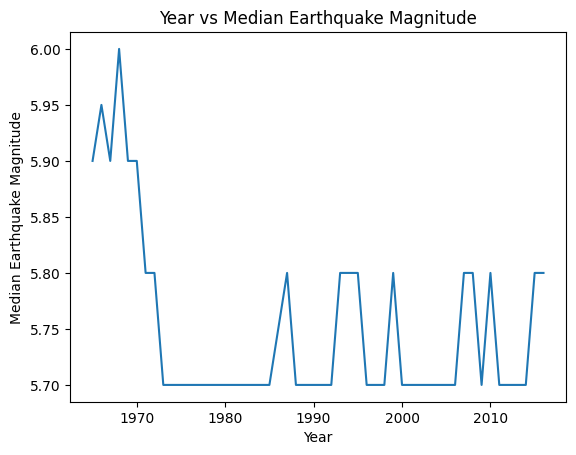

In [85]:
df_train.groupby('Year')['Magnitude'].median().plot()
plt.xlabel('Year')
plt.ylabel('Median Earthquake Magnitude')
plt.title('Year vs Median Earthquake Magnitude')

From the above plot, it can be seen that the median earthquake magnitude has not varied too much over the years

Text(0.5, 1.0, 'Month vs Median Earthquake Magnitude')

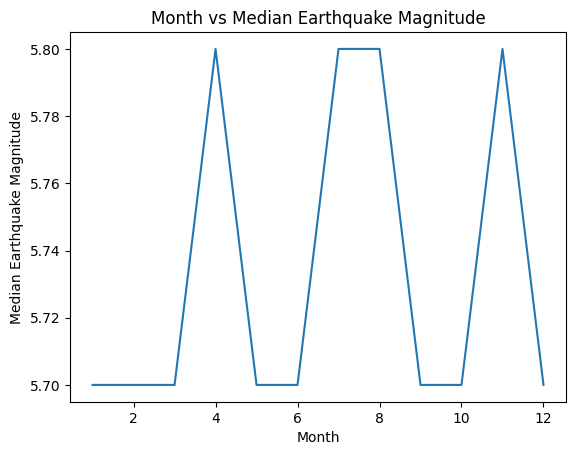

In [86]:
df_train.groupby('Month')['Magnitude'].median().plot()
plt.xlabel('Month')
plt.ylabel('Median Earthquake Magnitude')
plt.title('Month vs Median Earthquake Magnitude')

From the above plot, it can be seen that the median earthquake magnitude has not varied too much over the months

#### Plotting Jointplots

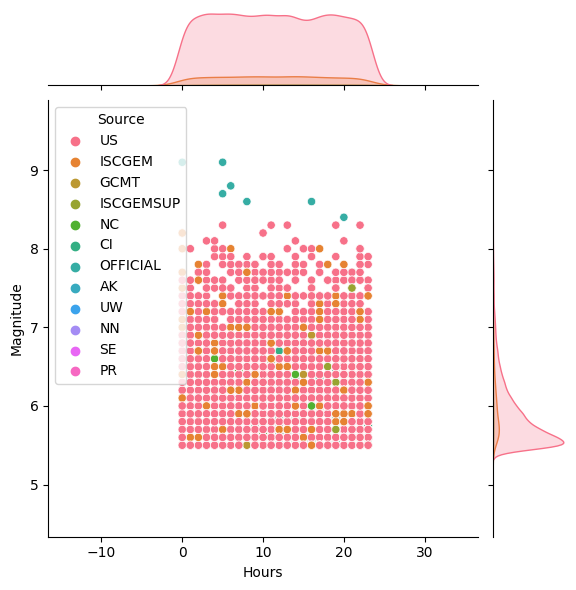

In [87]:
sns.jointplot(y='Magnitude', x='Hours', data=df_train, hue='Source')

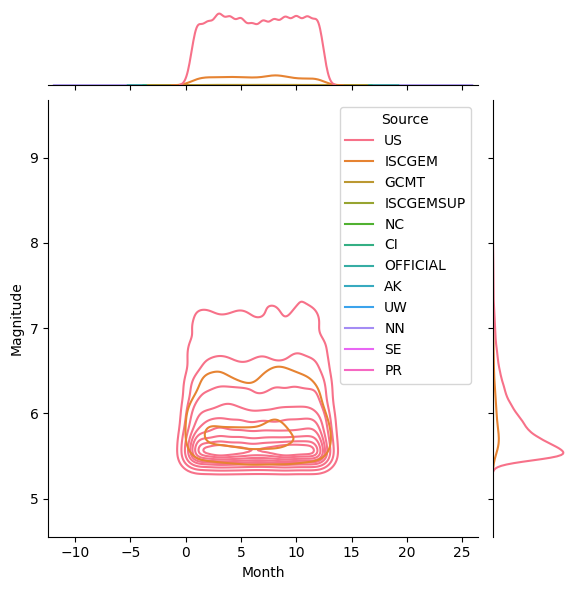

In [88]:
sns.jointplot(y='Magnitude', x='Month', data=df_train, hue='Source', kind='kde')

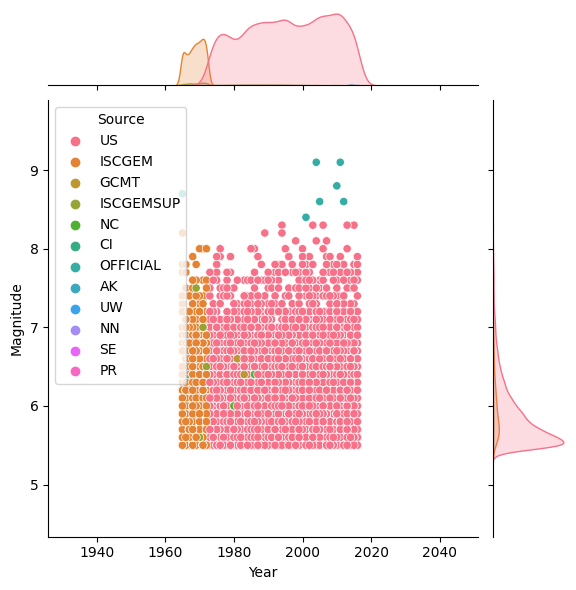

In [89]:
sns.jointplot(y='Magnitude', x='Year', data=df_train, hue='Source')

From the above jointplots, it can be concluded that the magnitude of an earthquake does not depend much on **Hour of the day**, **Month of the year** and the **Year**

#### Extracting the categorical features

In [90]:
categorical_features = [feature for feature in df_train.select_dtypes(np.object).columns]

In [91]:
categorical_features

['Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

#### Plotting barplot of categorical feature vs magnitude

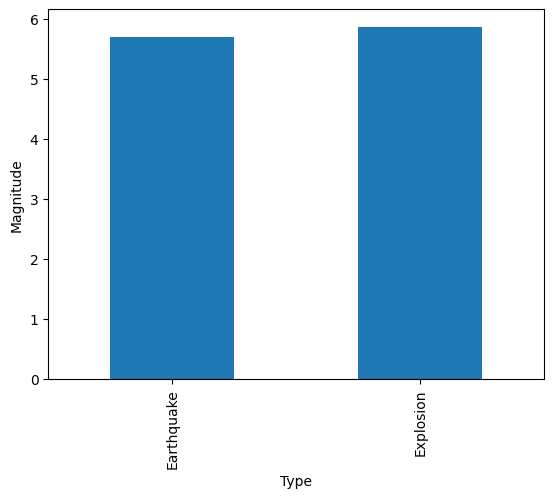

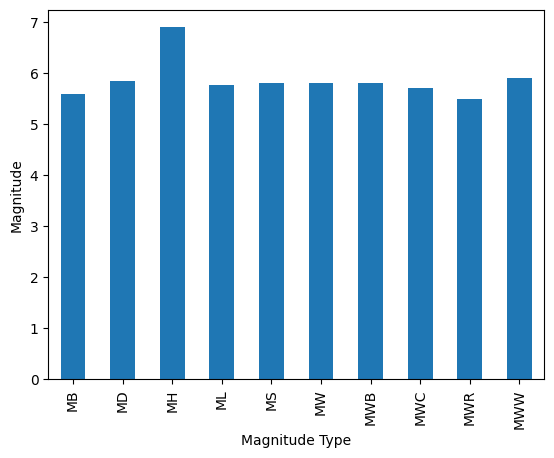

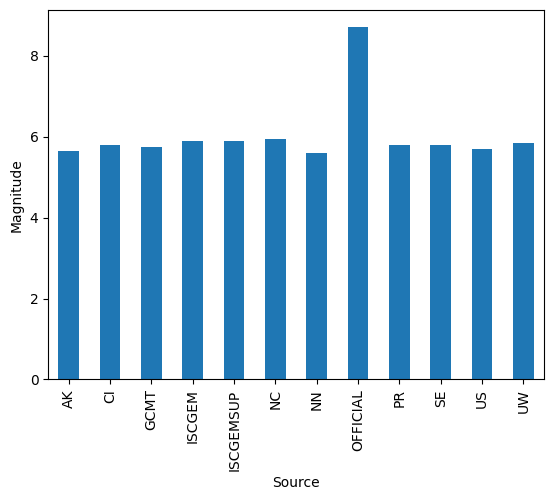

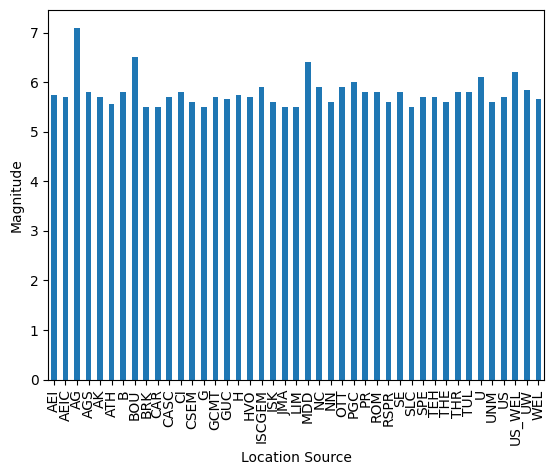

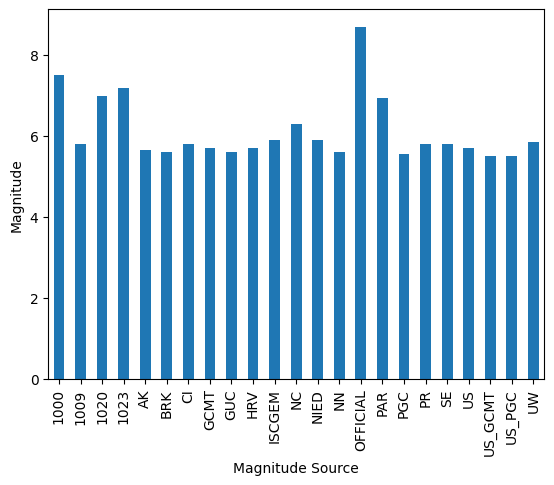

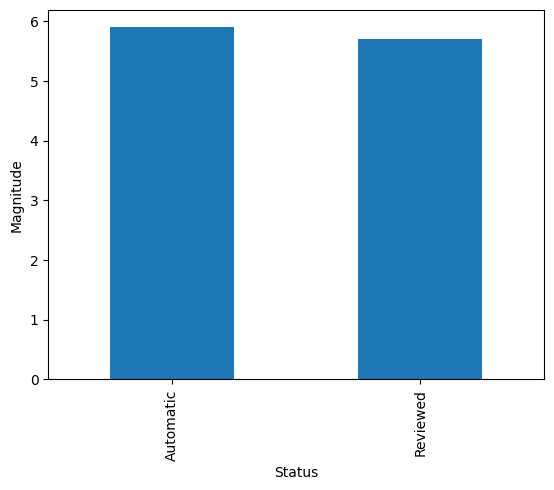

In [92]:
for feature in categorical_features:
  df_train.groupby(feature)['Magnitude'].median().plot(kind='bar')
  plt.xlabel(feature)
  plt.ylabel('Magnitude')
  plt.show()

Checking the unique values in the **categorical** columns

In [93]:
df_train[categorical_features].nunique()

Type                 2
Magnitude Type      10
Source              12
Location Source     43
Magnitude Source    23
Status               2
dtype: int64

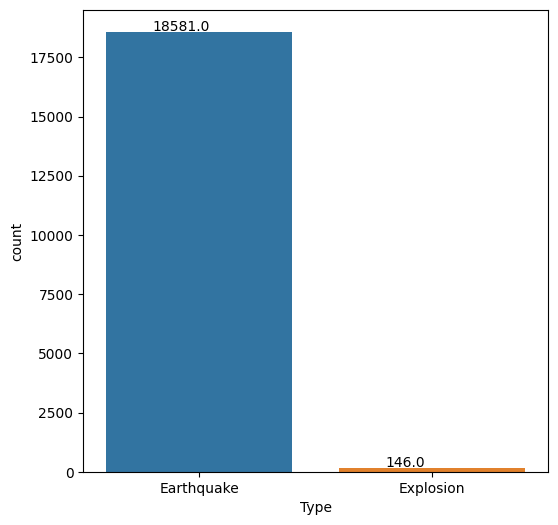

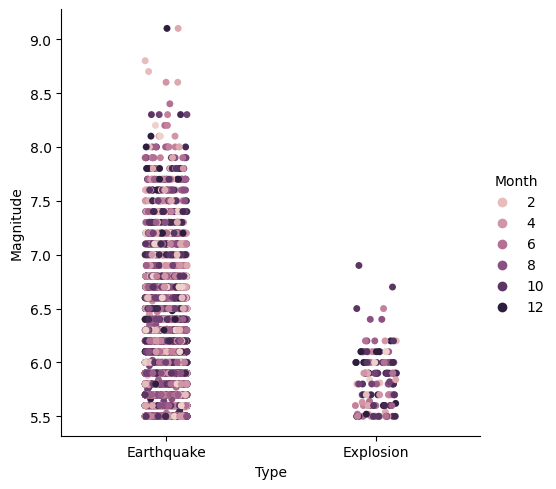

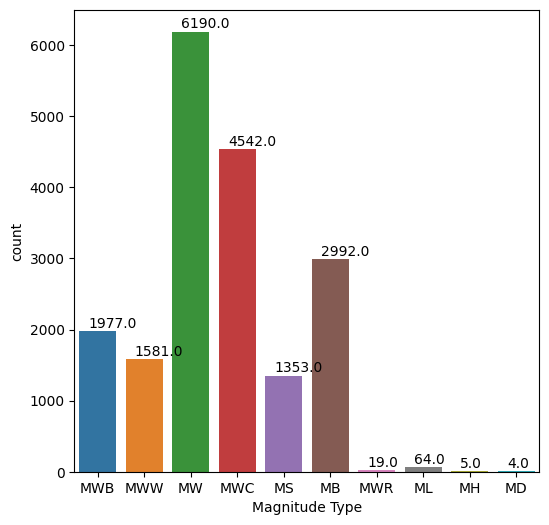

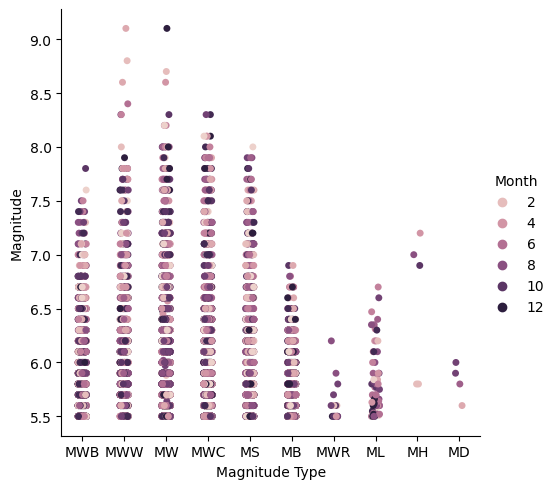

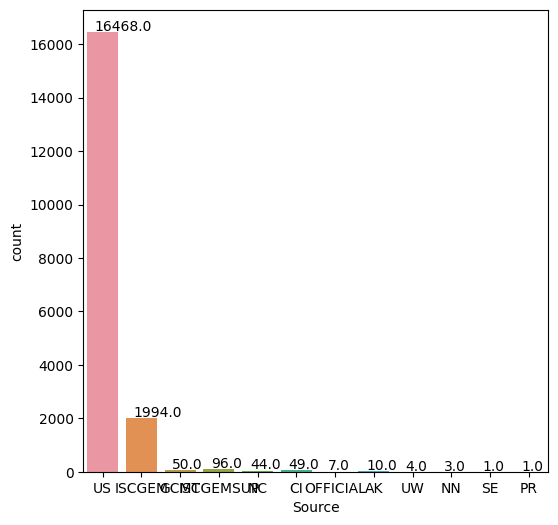

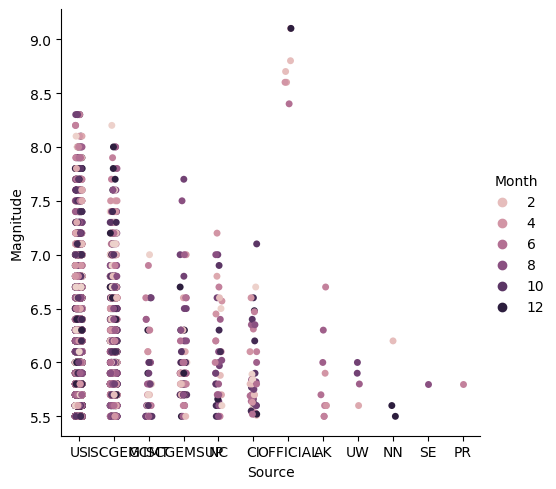

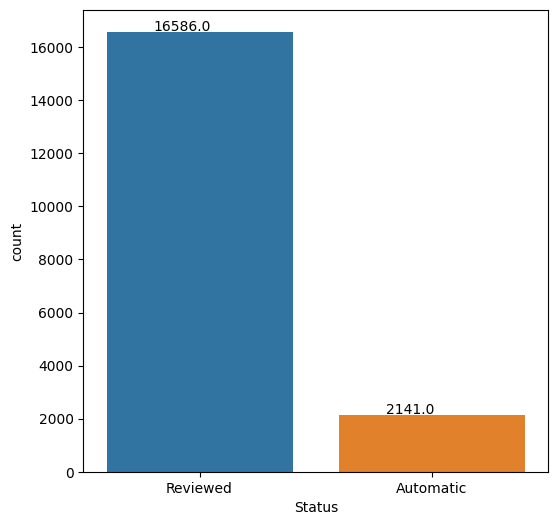

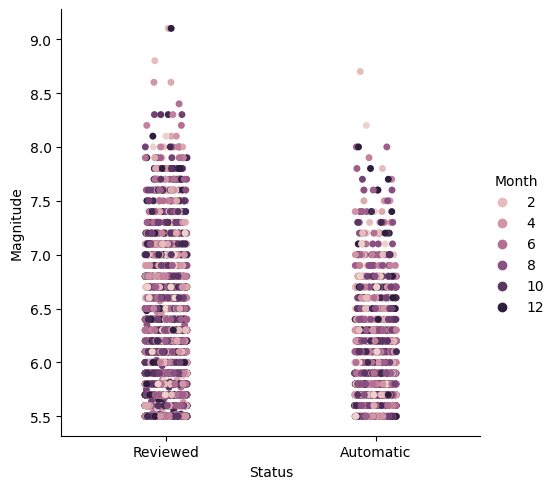

In [94]:
for feature in categorical_features:
    #print('Unique categories in the feature', feature, ': ', df_train[feature].nunique(), 'labels')
    if df_train[feature].nunique() <= 12:
      #print(df_train[feature].value_counts())
      plt.figure(figsize=(6,6))
      ax = sns.countplot(x=feature, data=df_train)
      for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))
      sns.catplot(x=feature, y='Magnitude', data=df_train, hue='Month')
      plt.show()

*From the plots, we can observe that most of the earthquakes are genuine earthquakes whereas very few earthquakes are due to explosions and rock burst. The magnitude of earthquake ranges from 5.5 to approx 9 for genuine earthquakes whereas the magnitude varies from 5.5 to 7 in the case of explosions*

Since the features **Source**, **Location Source** and **Magnitude Source** convey the same meaning more or less, we can drop any 2 of these features. Thus, we are dropping **Source** and **Magnitude Source** columns

In [95]:
df_train = df_train.drop(['Source', 'Magnitude Source'], axis=1)

In [96]:
categorical_features.remove('Source')

In [97]:
categorical_features.remove('Magnitude Source')

In [98]:
categorical_features

['Type', 'Magnitude Type', 'Location Source', 'Status']

In [99]:
pd.pivot_table(df_train, index='Type', values=continuous_features, aggfunc=['median'])

median                                                    \
           Azimuthal Gap Depth Depth Error Depth Seismic Stations Latitude   
Type                                                                         
Earthquake      3.583519  33.0    1.252763               5.537334   -3.591   
Explosion       4.276666   0.0    1.945910               4.844187   49.889   

                                                                  
           Longitude Magnitude Seismic Stations Root Mean Square  
Type                                                              
Earthquake   105.052                   3.349904              1.0  
Explosion     78.767                   4.043051              0.9

From the above pivot table, it can be concluded that compared to **Explosions** and **Rock Burst**, the natural earthquakes strike at lower depths

In [100]:
pd.pivot_table(df_train, index='Magnitude Type', values=continuous_features, aggfunc='median')

Azimuthal Gap   Depth  Depth Error  Depth Seismic Stations  \
Magnitude Type                                                               
MB                   3.583519  33.000     1.252763                5.537334   
MD                   4.276666  14.084     0.559616                5.073746   
MH                   4.276666   6.000     1.252763                4.844187   
ML                   4.276666   6.746     0.693147                4.844187   
MS                   3.583519  33.000     1.252763                5.537334   
MW                   3.583519  33.000     1.252763                5.537334   
MWB                  3.583519  30.000     1.252763                5.537334   
MWC                  3.583519  33.000     1.252763                5.537334   
MWR                  3.725693  10.000     1.252763                5.537334   
MWW                  3.258097  20.560     1.098612                5.537334   

                 Latitude   Longitude  Magnitude Seismic Stations  \
Magnitude Type                                                      
MB              -4.280000  122.893500                    3.349904   
MD              43.696333 -122.332417                    2.656757   
MH              37.036167 -121.879833                    2.656757   
ML              37.453500 -118.550083                    2.656757   
MS              -3.684000   97.902000                    3.349904   
MW              -1.733500  116.792500                    3.349904   
MWB             -3.100000   95.605000                    3.349904   
MWC             -4.511000   97.152000                    3.349904   
MWR             14.684000  -71.980000                    3.349904   
MWW             -4.551000  100.143200                    3.349904   

                Root Mean Square  
Magnitude Type                    
MB                          1.00  
MD                          0.70  
MH                          0.70  
ML                          0.70  
MS                          1.00  
MW                          1.00  
MWB                         0.98  
MWC                         1.00  
MWR                         0.94  
MWW                         0.94

Magnitude Type glossary :

 - MWC : centroid
 - MWW : (Moment W-phase)(generic notation Mw)
 - MB : short-period body wave
 - MWB : body wave
 - MS : 20 sec surface wave
 - MWW : Moment W-phase
 - MWR : regional
 - ML : local

In [101]:
pd.pivot_table(df_train, index='Status', values=continuous_features, aggfunc='median')

Azimuthal Gap  Depth  Depth Error  Depth Seismic Stations  \
Status                                                                 
Automatic       3.583519   30.8     1.252763                5.537334   
Reviewed        3.583519   33.0     1.252763                5.537334   

           Latitude  Longitude  Magnitude Seismic Stations  Root Mean Square  
Status                                                                        
Automatic    6.6000    124.320                    3.349904               1.0  
Reviewed    -4.1685    100.621                    3.349904               1.0

In [102]:
df_train.groupby(['Type', 'Magnitude Type'])[['Magnitude Type']].count().sort_values(['Type']).rename(columns={'Type':'Count'})

Magnitude Type
Type       Magnitude Type                
Earthquake MB                        2858
           MD                           4
           MH                           5
           ML                          53
           MS                        1353
           MW                        6190
           MWB                       1977
           MWC                       4541
           MWR                         19
           MWW                       1581
Explosion  MB                         134
           ML                          11
           MWC                          1

<Axes: xlabel='Type,Magnitude Type'>

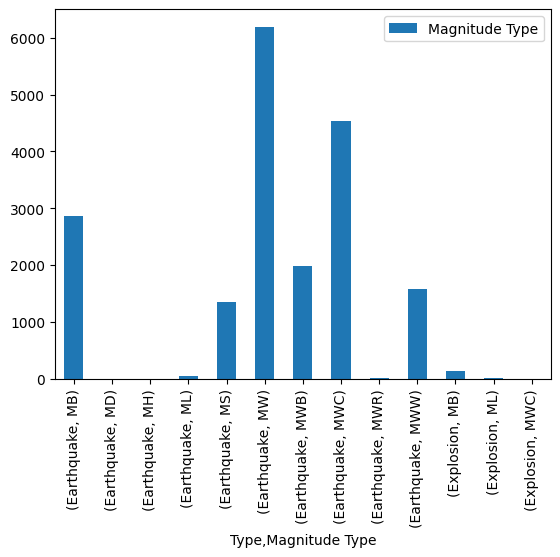

In [103]:
df_train.groupby(['Type', 'Magnitude Type'])[['Magnitude Type']].count().sort_values(['Type']).rename(columns={'Type':'Count'}).plot(kind='bar')

In [104]:
df_train.groupby(['Type', 'Status'])[['Status']].count().sort_values(['Type']).rename(columns={'Type':'Count'})

Status
Type       Status           
Earthquake Automatic    2141
           Reviewed    16440
Explosion  Reviewed      146

<Axes: xlabel='Type,Status'>

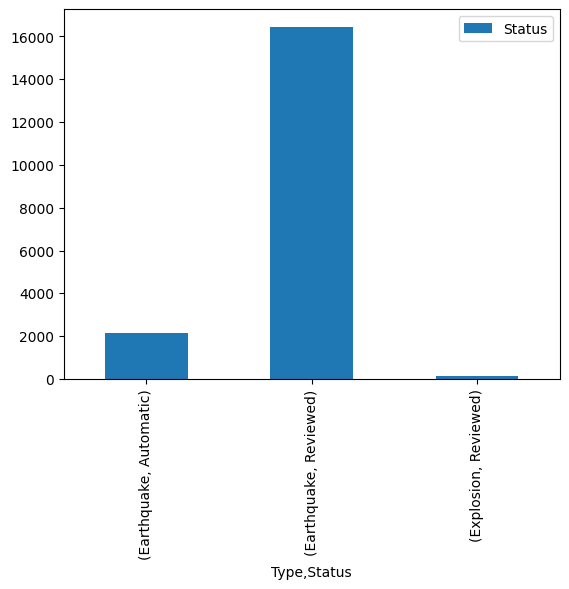

In [105]:
df_train.groupby(['Type', 'Status'])[['Status']].count().sort_values(['Type']).rename(columns={'Type':'Count'}).plot(kind='bar')

Defining function to gather the high count categories of categorical features with too many categories

In [106]:
dict_labels = {}
for feature in categorical_features:
  if df_train[feature].nunique() > 2:
    x = df_train[feature].value_counts().keys().tolist()
    y = df_train[feature].value_counts().tolist()
    l_labels = []
    l_counts = []
    #print(feature, x, y)
    for i in y:
      if (i/len(df_train))*100 > 1:
        ind = y.index(i)
        #print(x[ind], y[ind])
        l_labels.append(x[ind])
        l_counts.append(i)
    dict_labels[feature] = [l_labels, l_counts] 

In [107]:
dict_labels

{'Magnitude Type': [['MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS'],
  [6190, 4542, 2992, 1977, 1581, 1353]],
 'Location Source': [['US', 'ISCGEM'], [16242, 2091]]}

The above dictionary contains the categories for which the counts are high for the respective categorical variable

#### Performing one hot encoding

In [108]:
for feature in dict_labels.keys():
   for l in dict_labels[feature][0]:
    df_train[l] = np.where(df_train[feature] == l, 1, 0)

In [109]:
df_train.columns

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude Type',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Root Mean Square',
       'Location Source', 'Status', 'Magnitude', 'Day', 'Month', 'Year',
       'Hours', 'Minutes', 'Seconds', 'MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS',
       'US', 'ISCGEM'],
      dtype='object')

In [110]:
df_train = df_train.drop(['Magnitude Type', 'Location Source'], axis=1)

In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18727 entries, 0 to 18728
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude                    18727 non-null  float64
 1   Longitude                   18727 non-null  float64
 2   Type                        18727 non-null  object 
 3   Depth                       18727 non-null  float64
 4   Depth Error                 18727 non-null  float64
 5   Depth Seismic Stations      18727 non-null  float64
 6   Magnitude Seismic Stations  18727 non-null  float64
 7   Azimuthal Gap               18727 non-null  float64
 8   Root Mean Square            18727 non-null  float64
 9   Status                      18727 non-null  object 
 10  Magnitude                   18727 non-null  float64
 11  Day                         18727 non-null  int64  
 12  Month                       18727 non-null  int64  
 13  Year                        187

In [112]:
df_train.shape

(18727, 25)

In [113]:
df_train.head(8)

Latitude  Longitude        Type   Depth  Depth Error  \
0   14.9440   -61.2740  Earthquake  111.20     1.252763   
1  -14.4380   -75.9660  Earthquake   24.00     1.252763   
2   38.3400    20.4200  Earthquake   15.00     1.252763   
3   42.5250   145.0210  Earthquake   28.60     1.252763   
4  -15.8640  -172.0670  Earthquake   27.90     1.252763   
5  -19.9262   -70.7961  Earthquake    3.32     0.916291   
6  -24.0890   -70.1040  Earthquake   41.30     1.252763   
7    8.1160   -38.4130  Earthquake   10.00     1.252763   

   Depth Seismic Stations  Magnitude Seismic Stations  Azimuthal Gap  \
0                6.230481                    3.349904       2.890372   
1                6.161207                    3.349904       3.839452   
2                6.230481                    3.349904       3.566712   
3                6.220590                    3.349904       4.276666   
4                5.537334                    3.349904       3.583519   
5                5.537334                    3.349904       4.276666   
6                5.537334                    3.349904       3.583519   
7                5.537334                    3.349904       3.583519   

   Root Mean Square    Status  Magnitude  Day  Month  Year  Hours  Minutes  \
0              0.74  Reviewed        7.4   29     11  2007     19        0   
1              1.00  Reviewed        6.9   28     10  2011     18       54   
2              1.00  Reviewed        5.7   25      3  2007     13       57   
3              0.80  Reviewed        5.5    6      5  2004     13       43   
4              0.90  Reviewed        5.7   27      8  1988     16       30   
5              1.20  Reviewed        5.8   18      3  2014     21       26   
6              0.90  Reviewed        6.1    6      3  1987      7        6   
7              1.10  Reviewed        6.1   20      5  1988     14       58   

   Seconds  MW  MWC  MB  MWB  MWW  MS  US  ISCGEM  
0       20   0    0   0    1    0   0   1       0  
1       34   0    0   0    0    1   0   1       0  
2       58   0    0   0    1    0   0   0       0  
3       13   0    0   0    1    0   0   1       0  
4       17   1    0   0    0    0   0   1       0  
5       45   0    0   0    0    1   0   1       0  
6       44   1    0   0    0    0   0   1       0  
7       44   1    0   0    0    0   0   1       0

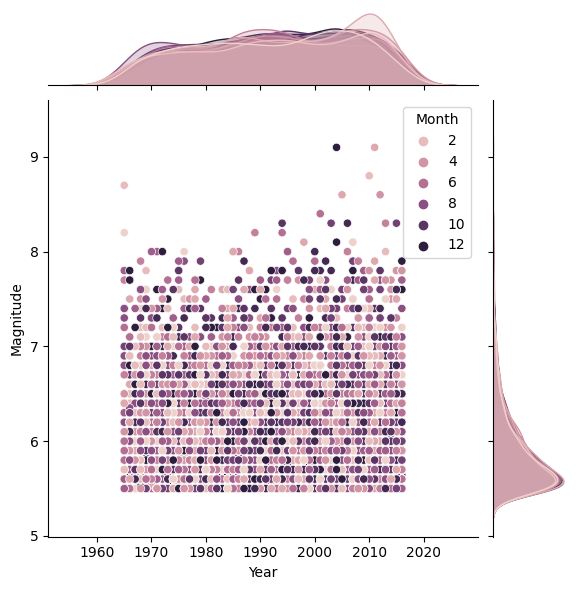

In [114]:
sns.jointplot(y='Magnitude', x='Year', data=df_train, hue='Month')

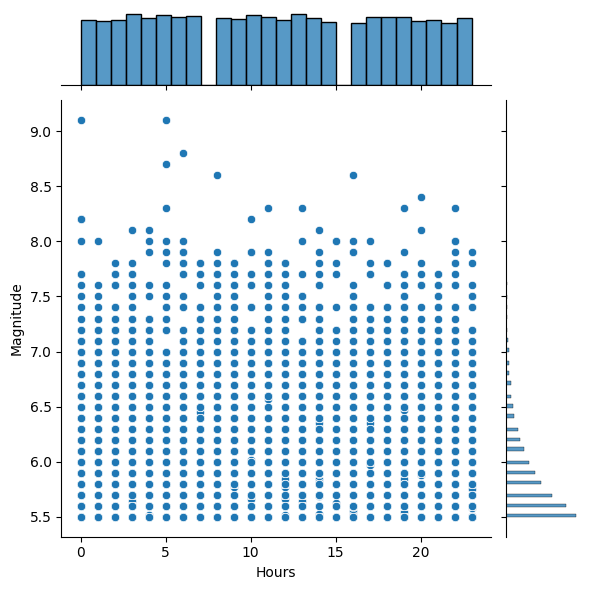

In [115]:
sns.jointplot(y='Magnitude', x='Hours', data=df_train)

In [116]:
df_train = df_train.drop(['Day', 'Month', 'Year', 'Hours', 'Minutes', 'Seconds'], axis = 1)

Encoding of categorical variable **Status**

In [117]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [118]:
df_train.head()

Latitude  Longitude  Depth  Depth Error  Depth Seismic Stations  \
0    14.944    -61.274  111.2     1.252763                6.230481   
1   -14.438    -75.966   24.0     1.252763                6.161207   
2    38.340     20.420   15.0     1.252763                6.230481   
3    42.525    145.021   28.6     1.252763                6.220590   
4   -15.864   -172.067   27.9     1.252763                5.537334   

   Magnitude Seismic Stations  Azimuthal Gap  Root Mean Square  Magnitude  MW  \
0                    3.349904       2.890372              0.74        7.4   0   
1                    3.349904       3.839452              1.00        6.9   0   
2                    3.349904       3.566712              1.00        5.7   0   
3                    3.349904       4.276666              0.80        5.5   0   
4                    3.349904       3.583519              0.90        5.7   1   

   MWC  MB  MWB  MWW  MS  US  ISCGEM  Type_Explosion  Status_Reviewed  
0    0   0    1    0   0   1       0               0                1  
1    0   0    0    1   0   1       0               0                1  
2    0   0    1    0   0   0       0               0                1  
3    0   0    1    0   0   1       0               0                1  
4    0   0    0    0   0   1       0               0                1

## Feature Scaling

In [119]:
df_train.reset_index(inplace = True, drop = True)

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
#Instantiating StandardScaler
sc = StandardScaler()

In [122]:
X_train = df_train.iloc[:, :7]

In [123]:
Y = df_train.loc[:, 'Magnitude']

In [124]:
#Fitting the dataframe X_train onto the standard scaler
df_train_continuous_features_transformed = sc.fit_transform(X_train)

In [125]:
df_train_continuous_features_transformed

array([[ 0.43664307, -0.80450049,  2.00385902, ...,  2.54342285,
        -0.01092165, -2.62565865],
       [-0.53691872, -0.92168572, -0.52619398, ...,  2.29451332,
        -0.01092165,  0.93799842],
       [ 1.21186095, -0.15289892, -0.7873233 , ...,  2.54342285,
        -0.01092165, -0.08610178],
       ...,
       [-0.28539372,  0.7182056 ,  2.00385902, ...,  0.05286901,
        -0.01092165, -0.02299353],
       [-0.23973419,  0.90672132, -0.35210776, ...,  0.05286901,
        -0.01092165, -0.02299353],
       [-2.06836833, -0.5218984 , -0.93239515, ..., -2.43768483,
        -0.01092165, -0.02299353]])

In [126]:
X_train_scaled = pd.DataFrame(df_train_continuous_features_transformed, columns=X_train.columns)

In [127]:
X_train_scaled.head()

Latitude  Longitude     Depth  Depth Error  Depth Seismic Stations  \
0  0.436643  -0.804500  2.003859    -0.011417                2.543423   
1 -0.536919  -0.921686 -0.526194    -0.011417                2.294513   
2  1.211861  -0.152899 -0.787323    -0.011417                2.543423   
3  1.350529   0.840934 -0.392728    -0.011417                2.507882   
4 -0.584169  -1.688199 -0.413038    -0.011417                0.052869   

   Magnitude Seismic Stations  Azimuthal Gap  
0                   -0.010922      -2.625659  
1                   -0.010922       0.937998  
2                   -0.010922      -0.086102  
3                   -0.010922       2.579672  
4                   -0.010922      -0.022994

In [128]:
X = pd.concat([X_train_scaled, df_train.iloc[:, 9:]], axis=1)

In [129]:
X.head()

Latitude  Longitude     Depth  Depth Error  Depth Seismic Stations  \
0  0.436643  -0.804500  2.003859    -0.011417                2.543423   
1 -0.536919  -0.921686 -0.526194    -0.011417                2.294513   
2  1.211861  -0.152899 -0.787323    -0.011417                2.543423   
3  1.350529   0.840934 -0.392728    -0.011417                2.507882   
4 -0.584169  -1.688199 -0.413038    -0.011417                0.052869   

   Magnitude Seismic Stations  Azimuthal Gap  MW  MWC  MB  MWB  MWW  MS  US  \
0                   -0.010922      -2.625659   0    0   0    1    0   0   1   
1                   -0.010922       0.937998   0    0   0    0    1   0   1   
2                   -0.010922      -0.086102   0    0   0    1    0   0   0   
3                   -0.010922       2.579672   0    0   0    1    0   0   1   
4                   -0.010922      -0.022994   1    0   0    0    0   0   1   

   ISCGEM  Type_Explosion  Status_Reviewed  
0       0               0                1  
1       0               0                1  
2       0               0                1  
3       0               0                1  
4       0               0                1

In [130]:
Y.head()

0    7.4
1    6.9
2    5.7
3    5.5
4    5.7
Name: Magnitude, dtype: float64

#### Feature Selection

In [131]:
from sklearn.ensemble import ExtraTreesRegressor

In [132]:
model = ExtraTreesRegressor()

In [133]:
model.fit(X,Y)

ExtraTreesRegressor()

In [134]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending = False)

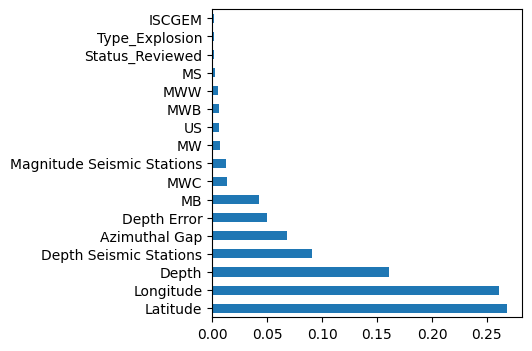

In [135]:
plt.figure(figsize=(4,4))
feat_importances.plot(kind='barh')
plt.show()

In [136]:
from sklearn.feature_selection import VarianceThreshold

In [137]:
var_thres = VarianceThreshold(threshold=0)

In [138]:
X_train_variance, X_test_variance, y_train_variance, y_test_variance = train_test_split(X, Y, test_size = 0.15, random_state = 42, shuffle=True)

In [139]:
var_thres.fit(X_train_variance)

VarianceThreshold(threshold=0)

In [140]:
sum(var_thres.get_support())

17

In [141]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [142]:
constant_columns = [column for column in X.columns if column not in X.columns[var_thres.get_support()]]

In [143]:
print(constant_columns)

[]


In [144]:
X.columns

Index(['Latitude', 'Longitude', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS', 'US', 'ISCGEM', 'Type_Explosion',
       'Status_Reviewed'],
      dtype='object')

In [145]:
for feature in constant_columns:
  X = X.drop([feature], axis = 1)

In [146]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [147]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [148]:
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [149]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False, False])

In [150]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [151]:
selected_feat

Index(['Longitude', 'Depth', 'Depth Error', 'Depth Seismic Stations',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'MWC', 'MB', 'MS', 'US',
       'ISCGEM'],
      dtype='object')

In [152]:
X.columns

Index(['Latitude', 'Longitude', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS', 'US', 'ISCGEM', 'Type_Explosion',
       'Status_Reviewed'],
      dtype='object')

In [153]:
df_train = X.join(Y, how='inner')

In [154]:
df_train = df_train.drop(['ISCGEM', 'Status_Reviewed', 'MW', 'US', 'MWB', 'MS', 'MWW'], axis=1)

<Axes: >

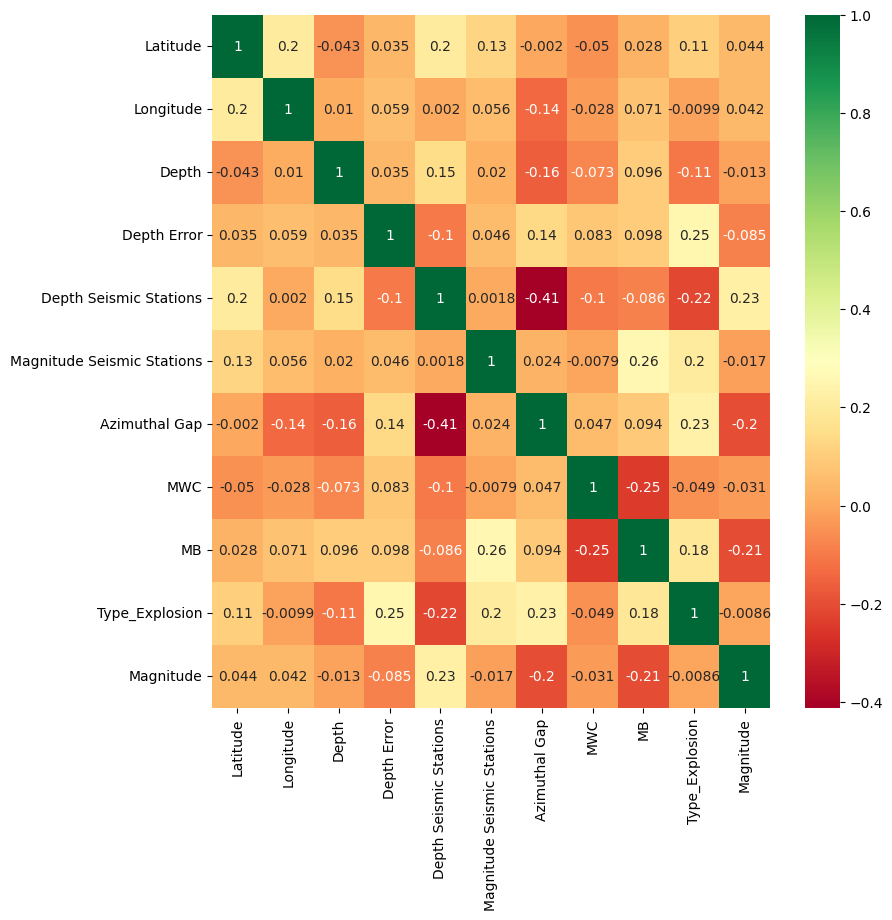

In [155]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")

In [156]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18727 entries, 0 to 18726
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude                    18727 non-null  float64
 1   Longitude                   18727 non-null  float64
 2   Depth                       18727 non-null  float64
 3   Depth Error                 18727 non-null  float64
 4   Depth Seismic Stations      18727 non-null  float64
 5   Magnitude Seismic Stations  18727 non-null  float64
 6   Azimuthal Gap               18727 non-null  float64
 7   MWC                         18727 non-null  int64  
 8   MB                          18727 non-null  int64  
 9   Type_Explosion              18727 non-null  uint8  
 10  Magnitude                   18727 non-null  float64
dtypes: float64(8), int64(2), uint8(1)
memory usage: 1.4 MB


## Data Preprocessing of the test data

In [157]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        4683 non-null   object 
 1   Time                        4683 non-null   object 
 2   Latitude                    4683 non-null   float64
 3   Longitude                   4683 non-null   float64
 4   Type                        4683 non-null   object 
 5   Depth                       4683 non-null   float64
 6   Depth Error                 885 non-null    float64
 7   Depth Seismic Stations      1435 non-null   float64
 8   Magnitude Type              4682 non-null   object 
 9   Magnitude Error             56 non-null     float64
 10  Magnitude Seismic Stations  495 non-null    float64
 11  Azimuthal Gap               1443 non-null   float64
 12  Horizontal Distance         302 non-null    float64
 13  Horizontal Error            213 n

In [158]:
df_test.isnull().sum()

Date                             0
Time                             0
Latitude                         0
Longitude                        0
Type                             0
Depth                            0
Depth Error                   3798
Depth Seismic Stations        3248
Magnitude Type                   1
Magnitude Error               4627
Magnitude Seismic Stations    4188
Azimuthal Gap                 3240
Horizontal Distance           4381
Horizontal Error              4470
Root Mean Square              1212
ID                               0
Source                           0
Location Source                  0
Magnitude Source                 0
Status                           0
Magnitude                        0
dtype: int64

In [159]:
(df_test.isnull().sum()/len(df_test))

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.811019
Depth Seismic Stations        0.693572
Magnitude Type                0.000214
Magnitude Error               0.988042
Magnitude Seismic Stations    0.894299
Azimuthal Gap                 0.691864
Horizontal Distance           0.935511
Horizontal Error              0.954516
Root Mean Square              0.258808
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
Magnitude                     0.000000
dtype: float64

In [160]:
for feature in df_test.columns:
  if (df_test[feature].isnull().sum()/len(df_test))*100 > 90:
    df_test = df_test.drop([feature], axis=1)
  elif (df_test[feature].isnull().sum()/len(df_test))*100 <= 1:
    df_test = df_test.dropna(subset=[feature])

In [161]:
(df_test.isnull().sum()/len(df_test))

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.810978
Depth Seismic Stations        0.693507
Magnitude Type                0.000000
Magnitude Seismic Stations    0.894276
Azimuthal Gap                 0.691798
Root Mean Square              0.258650
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
Magnitude                     0.000000
dtype: float64

In [162]:
df_test["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

In [163]:
df_test["Type"].replace({"Rock Burst": "Explosion"}, inplace=True)

In [164]:
impute_dataset(df_test, 'Type')

In [165]:
(df_test.isnull().sum()/len(df_test))

Date                          0.0
Time                          0.0
Latitude                      0.0
Longitude                     0.0
Type                          0.0
Depth                         0.0
Depth Error                   0.0
Depth Seismic Stations        0.0
Magnitude Type                0.0
Magnitude Seismic Stations    0.0
Azimuthal Gap                 0.0
Root Mean Square              0.0
ID                            0.0
Source                        0.0
Location Source               0.0
Magnitude Source              0.0
Status                        0.0
Magnitude                     0.0
dtype: float64

In [166]:
df_test = df_test.drop(['ID'], axis = 1)

In [167]:
remove_outliers(df_test, continuous_features)

In [168]:
skewness_score(df_test, continuous_features)

Feature  Skewness Score before transformation  \
0                    Latitude                              0.136978   
1                   Longitude                             -0.611178   
2                       Depth                              1.064511   
3                 Depth Error                              2.057879   
4      Depth Seismic Stations                              1.259344   
5  Magnitude Seismic Stations                              2.780760   
6               Azimuthal Gap                              1.662728   
7            Root Mean Square                              0.267251   

  Skewness score after log transformation of skewed features  
0                                    Not transformed          
1                                    Not transformed          
2                                    Not transformed          
3                                           0.051728          
4                                          -0.418669          
5                                           0.197765          
6                                           0.165636          
7                                    Not transformed

In [169]:
df_test = df_test.drop(['Date', 'Time'], axis = 1)

In [170]:
categorical_features = [feature for feature in df_test.select_dtypes(np.object).columns]

In [171]:
categorical_features

['Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [172]:
df_test[categorical_features].nunique()

Type                 2
Magnitude Type       9
Source              10
Location Source     32
Magnitude Source    15
Status               2
dtype: int64

In [173]:
df_test = df_test.drop(['Source', 'Magnitude Source'], axis=1)

In [174]:
categorical_features.remove('Source')

In [175]:
categorical_features.remove('Magnitude Source')

In [176]:
categorical_features

['Type', 'Magnitude Type', 'Location Source', 'Status']

In [177]:
dict_labels = {}
for feature in categorical_features:
  if df_test[feature].nunique() > 2:
    x = df_test[feature].value_counts().keys().tolist()
    y = df_test[feature].value_counts().tolist()
    l_labels = []
    l_counts = []
    #print(feature, x, y)
    for i in y:
      if (i/len(df_test))*100 > 1:
        ind = y.index(i)
        #print(x[ind], y[ind])
        l_labels.append(x[ind])
        l_counts.append(i)
    dict_labels[feature] = [l_labels, l_counts] 

In [178]:
dict_labels

{'Magnitude Type': [['MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS'],
  [1532, 1127, 769, 481, 402, 349]],
 'Location Source': [['US', 'ISCGEM'], [4108, 490]]}

In [179]:
for feature in dict_labels.keys():
  print(feature)

Magnitude Type
Location Source


In [180]:
for feature in dict_labels.keys():
  for l in dict_labels[feature][0]:
    df_test[l] = np.where(df_test[feature] == l, 1, 0)

In [181]:
df_test.columns

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude Type',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Root Mean Square',
       'Location Source', 'Status', 'Magnitude', 'MW', 'MWC', 'MB', 'MWB',
       'MWW', 'MS', 'US', 'ISCGEM'],
      dtype='object')

In [182]:
df_test = df_test.drop(['Magnitude Type', 'Location Source'], axis=1)

In [183]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 4682
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude                    4682 non-null   float64
 1   Longitude                   4682 non-null   float64
 2   Type                        4682 non-null   object 
 3   Depth                       4682 non-null   float64
 4   Depth Error                 4682 non-null   float64
 5   Depth Seismic Stations      4682 non-null   float64
 6   Magnitude Seismic Stations  4682 non-null   float64
 7   Azimuthal Gap               4682 non-null   float64
 8   Root Mean Square            4682 non-null   float64
 9   Status                      4682 non-null   object 
 10  Magnitude                   4682 non-null   float64
 11  MW                          4682 non-null   int64  
 12  MWC                         4682 non-null   int64  
 13  MB                          4682 

In [184]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [185]:
df_test.head()

Latitude  Longitude     Depth  Depth Error  Depth Seismic Stations  \
0     3.166     99.015  119.6875     1.223775                5.572154   
1    43.679    -29.020   10.0000     1.223775                5.572154   
2     1.142     98.911   77.6000     1.223775                5.843544   
3    38.649     15.390  119.6875     1.223775                6.265301   
4    38.457     31.351   10.0000     1.223775                5.159055   

   Magnitude Seismic Stations  Azimuthal Gap  Root Mean Square  Magnitude  MW  \
0                    3.178054       3.555348              1.00        5.6   0   
1                    3.178054       3.555348              0.84        5.5   0   
2                    3.178054       4.048301              0.88        5.5   0   
3                    3.178054       2.862201              1.05        5.8   0   
4                    3.178054       3.555348              1.24        6.0   0   

   MWC  MB  MWB  MWW  MS  US  ISCGEM  Type_Explosion  Status_Reviewed  
0    0   1    0    0   0   1       0               0                1  
1    1   0    0    0   0   1       0               0                1  
2    0   0    1    0   0   1       0               0                1  
3    1   0    0    0   0   1       0               0                1  
4    1   0    0    0   0   1       0               0                1

In [186]:
df_test.reset_index(inplace = True, drop = True)

In [187]:
X_test = df_test.iloc[:, :7]

In [188]:
Y = df_test.loc[:, 'Magnitude']

In [189]:
#Fitting the dataframe X_train onto the standard scaler
df_test_continuous_features_transformed = sc.transform(X_test)

In [190]:
df_test_continuous_features_transformed

array([[ 0.04638336,  0.47398463,  2.25011848, ...,  0.17798025,
        -0.86008072, -0.12877101],
       [ 1.38876675, -0.54723855, -0.93239515, ...,  0.17798025,
        -0.86008072, -0.12877101],
       [-0.02068113,  0.47315511,  1.02897621, ...,  1.15311566,
        -0.86008072,  1.72219293],
       ...,
       [ 1.14774543,  0.24833207,  2.25011848, ...,  0.17798025,
        -0.86008072, -0.12877101],
       [-0.78592549,  1.07859884, -0.92659227, ...,  0.17798025,
        -0.86008072, -0.12877101],
       [-1.07701324, -0.88999657, -0.26506466, ...,  0.17798025,
        -0.86008072, -0.12877101]])

In [191]:
X_test_scaled = pd.DataFrame(df_test_continuous_features_transformed, columns=X_test.columns)

In [192]:
X_test_scaled.head()

Latitude  Longitude     Depth  Depth Error  Depth Seismic Stations  \
0  0.046383   0.473985  2.250118    -0.129851                0.177980   
1  1.388767  -0.547239 -0.932395    -0.129851                0.177980   
2 -0.020681   0.473155  1.028976    -0.129851                1.153116   
3  1.222100  -0.193019  2.250118    -0.129851                2.668534   
4  1.215738  -0.065712 -0.932395    -0.129851               -1.306329   

   Magnitude Seismic Stations  Azimuthal Gap  
0                   -0.860081      -0.128771  
1                   -0.860081      -0.128771  
2                   -0.860081       1.722193  
3                   -0.860081      -2.731436  
4                   -0.860081      -0.128771

In [193]:
X = pd.concat([X_test_scaled, df_test.iloc[:, 9:]], axis=1)

In [194]:
X.head()

Latitude  Longitude     Depth  Depth Error  Depth Seismic Stations  \
0  0.046383   0.473985  2.250118    -0.129851                0.177980   
1  1.388767  -0.547239 -0.932395    -0.129851                0.177980   
2 -0.020681   0.473155  1.028976    -0.129851                1.153116   
3  1.222100  -0.193019  2.250118    -0.129851                2.668534   
4  1.215738  -0.065712 -0.932395    -0.129851               -1.306329   

   Magnitude Seismic Stations  Azimuthal Gap  MW  MWC  MB  MWB  MWW  MS  US  \
0                   -0.860081      -0.128771   0    0   1    0    0   0   1   
1                   -0.860081      -0.128771   0    1   0    0    0   0   1   
2                   -0.860081       1.722193   0    0   0    1    0   0   1   
3                   -0.860081      -2.731436   0    1   0    0    0   0   1   
4                   -0.860081      -0.128771   0    1   0    0    0   0   1   

   ISCGEM  Type_Explosion  Status_Reviewed  
0       0               0                1  
1       0               0                1  
2       0               0                1  
3       0               0                1  
4       0               0                1

In [195]:
Y.head()

0    5.6
1    5.5
2    5.5
3    5.8
4    6.0
Name: Magnitude, dtype: float64

In [196]:
df_test = X.join(Y, how='inner')

In [197]:
for feature in constant_columns:
  df_test = df_test.drop([feature], axis = 1)

In [198]:
df_test = df_test.drop(['ISCGEM', 'Status_Reviewed', 'MW', 'US', 'MWB', 'MS', 'MWW'], axis=1)

In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude                    4682 non-null   float64
 1   Longitude                   4682 non-null   float64
 2   Depth                       4682 non-null   float64
 3   Depth Error                 4682 non-null   float64
 4   Depth Seismic Stations      4682 non-null   float64
 5   Magnitude Seismic Stations  4682 non-null   float64
 6   Azimuthal Gap               4682 non-null   float64
 7   MWC                         4682 non-null   int64  
 8   MB                          4682 non-null   int64  
 9   Type_Explosion              4682 non-null   uint8  
 10  Magnitude                   4682 non-null   float64
dtypes: float64(8), int64(2), uint8(1)
memory usage: 370.5 KB


In [200]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18727 entries, 0 to 18726
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude                    18727 non-null  float64
 1   Longitude                   18727 non-null  float64
 2   Depth                       18727 non-null  float64
 3   Depth Error                 18727 non-null  float64
 4   Depth Seismic Stations      18727 non-null  float64
 5   Magnitude Seismic Stations  18727 non-null  float64
 6   Azimuthal Gap               18727 non-null  float64
 7   MWC                         18727 non-null  int64  
 8   MB                          18727 non-null  int64  
 9   Type_Explosion              18727 non-null  uint8  
 10  Magnitude                   18727 non-null  float64
dtypes: float64(8), int64(2), uint8(1)
memory usage: 1.4 MB


## Separating the input and target variables

Separating the input features from the target such that the dataset is in the form of (X,y) or (Features, Label)

In [201]:
X_train = df_train.drop(columns=["Magnitude"], axis=1)
Y_train = df_train.Magnitude

In [202]:
X_test = df_test.drop(columns=["Magnitude"], axis=1)
Y_test = df_test.Magnitude

#### Model Building

*We will create a Linear Regression model*

In [203]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [204]:
regressor = LinearRegression()

In [205]:
#Fitting the training data on the Linear Regression model
regressor.fit(X_train, Y_train)

LinearRegression()

In [206]:
#Intercept of the best fit line of regression
print("Intercept : ", regressor.intercept_)

Intercept :  5.928788509350276


In [207]:
regressor.coef_

array([-0.00413838,  0.01832125, -0.01254989, -0.02209828,  0.07383411,
        0.00875234, -0.05104287, -0.05116647, -0.24255913,  0.47892209])

In [208]:
Y_pred_logistic_regression = regressor.predict(X_test)

In [209]:
from sklearn import metrics

In [210]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_logistic_regression))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_logistic_regression))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_logistic_regression)))

Mean absolute error :  0.29556289607428055
Mean squared error :  0.1651105004354498
Root mean squared error :  0.4063379141003825


In [211]:
from sklearn.metrics import r2_score

In [212]:
r2_score(Y_test, Y_pred_logistic_regression)

0.1050202644135807

<Axes: xlabel='Magnitude', ylabel='Density'>

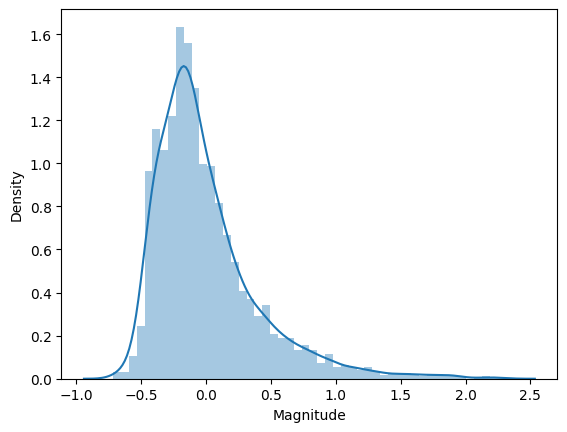

In [213]:
sns.distplot(Y_test-Y_pred_logistic_regression)

The distplot of the difference the y_test and Y_pred_logistic_regression is almost a Gaussian distribution

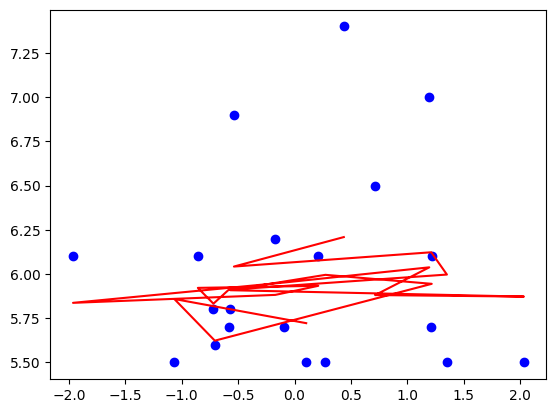

In [214]:
plt.scatter(x=X_train['Latitude'][:20], y=Y_train[:20], color='blue')
plt.plot(X_train['Latitude'][:20], regressor.predict(X_train)[:20], color='red')
plt.show()

In [215]:
cross_val_score(regressor, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)

array([-0.15306744, -0.15857744, -0.16328898, -0.15074496, -0.16181484])

In [216]:
np.mean(cross_val_score(regressor, X_train, Y_train, scoring='neg_mean_squared_error', cv=5))

-0.1574987333991656

In [217]:
from sklearn.model_selection import RandomizedSearchCV

In [218]:
ridge = Ridge()

In [219]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100] }

In [220]:
ridge_regressor = RandomizedSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

In [221]:
ridge_regressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50, 55, 100]},
                   scoring='neg_mean_squared_error')

In [222]:
print(ridge_regressor.best_params_)

{'alpha': 1}


In [223]:
print(ridge_regressor.best_score_)

-0.15749858095108174


In [224]:
Y_pred_ridge_regression = ridge_regressor.predict(X_test)

In [225]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_ridge_regression))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_ridge_regression))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge_regression)))

Mean absolute error :  0.2955544493025827
Mean squared error :  0.16511505430114695
Root mean squared error :  0.4063435176068974


In [226]:
r2_score(Y_test, Y_pred_ridge_regression)

0.10499558023233979

In [227]:
lasso = Lasso()

In [228]:
lasso_regressor = RandomizedSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

In [229]:
lasso_regressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50, 55, 100]},
                   scoring='neg_mean_squared_error')

In [230]:
print(lasso_regressor.best_params_)

{'alpha': 1e-08}


In [231]:
print(lasso_regressor.best_score_)

-0.1574987333260939


In [232]:
Y_pred_lasso_regression = lasso_regressor.predict(X_test)

In [233]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_lasso_regression))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_lasso_regression))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso_regression)))

Mean absolute error :  0.29556289650371353
Mean squared error :  0.16511050245004377
Root mean squared error :  0.40633791657934626


In [234]:
r2_score(Y_test, Y_pred_lasso_regression)

0.10502025349349531

In [235]:
from sklearn import svm

In [236]:
svm_regressor = svm.SVR(kernel='rbf')

In [237]:
svm_regressor.fit(X_train, Y_train)

SVR()

In [238]:
Y_pred_SVR = regressor.predict(X_test)

In [239]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, Y_pred_SVR))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred_SVR))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_SVR)))

Mean absolute error :  0.29556289607428055
Mean squared error :  0.1651105004354498
Root mean squared error :  0.4063379141003825


In [240]:
r2_score(Y_test, Y_pred_SVR)

0.1050202644135807

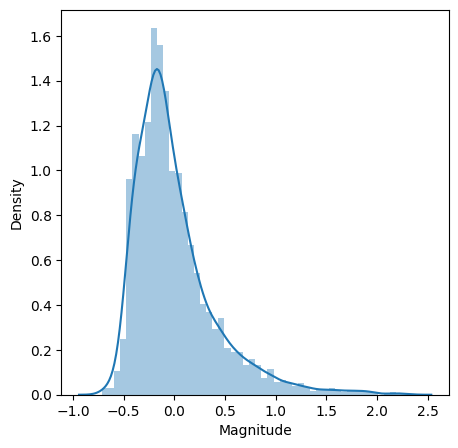

In [241]:
plt.figure(figsize = (5,5))
sns.distplot(Y_test-Y_pred_SVR)
plt.show()

*Now we will build RandomForestRegressor model*

In [242]:
from sklearn.ensemble import RandomForestRegressor

We will perform hyperparameter tuning for Random Forest Regressor model

In [243]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [244]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#max_features = [2, 3, 4]
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]

In [245]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10],
 'bootstrap': [True, False]}

In [246]:
rfc = RandomForestRegressor()

In [247]:
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 4, cv = 4, random_state = 42, verbose = 2, n_jobs=1)

In [248]:
rsc.fit(X_train, Y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  20.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  22.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  22.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=4, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [249]:
pd.DataFrame(rsc.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.431863      3.288106         0.425907        0.006418   
1      23.596527      1.146724         0.320021        0.180546   
2      17.257107      0.378993         0.506694        0.022913   
3      21.741564      0.342226         0.713183        0.048906   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                900                       5                      5   
1                300                     100                      2   
2                700                       2                     10   
3                800                      10                      5   

  param_max_features param_max_depth param_bootstrap  \
0               sqrt              10            True   
1               auto              30           False   
2               sqrt              25           False   
3               sqrt              25           False   

                                              params  split0_test_score  \
0  {'n_estimators': 900, 'min_samples_split': 5, ...          -0.139765   
1  {'n_estimators': 300, 'min_samples_split': 100...          -0.156003   
2  {'n_estimators': 700, 'min_samples_split': 2, ...          -0.138412   
3  {'n_estimators': 800, 'min_samples_split': 10,...          -0.138920   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0          -0.149740          -0.141262          -0.148388        -0.144788   
1          -0.169101          -0.156359          -0.164982        -0.161611   
2          -0.146875          -0.138771          -0.146233        -0.142573   
3          -0.147027          -0.139052          -0.146504        -0.142876   

   std_test_score  rank_test_score  
0        0.004334                3  
1        0.005624                4  
2        0.003990                1  
3        0.003894                2

In [250]:
rsc.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': False}

In [251]:
#regressor_RandomForest_BestParams = RandomForestRegressor(n_estimators=rsc.best_params_['n_estimators'], min_samples_split=rsc.best_params_['min_samples_split'], min_samples_leaf=rsc.best_params_['min_samples_leaf'], max_features=rsc.best_params_['max_features'], max_depth=rsc.best_params_['max_depth'], bootstrap=rsc.best_params_['bootstrap'])

In [252]:
regressor_RandomForest_BestParams = rsc.best_estimator_

In [253]:
regressor_RandomForest_BestParams.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                      min_samples_leaf=10, n_estimators=700)

In [254]:
predictions_rfr_bestParams = regressor_RandomForest_BestParams.predict(X_test)

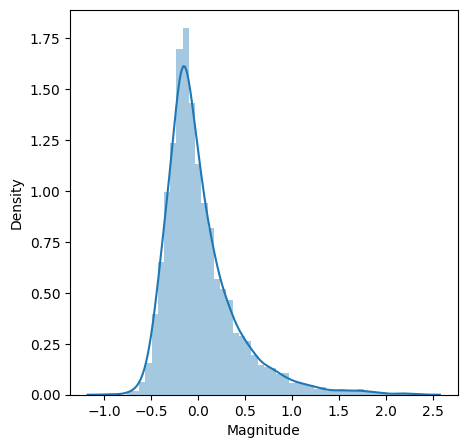

In [255]:
plt.figure(figsize = (5,5))
sns.distplot(Y_test-predictions_rfr_bestParams)
plt.show()

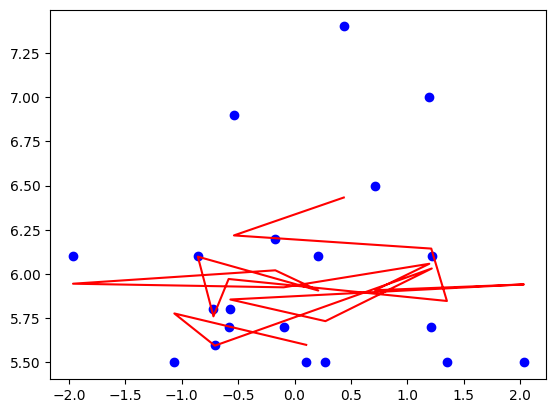

In [256]:
plt.scatter(x=X_train['Latitude'][:20], y=Y_train[:20], color='blue')
plt.plot(X_train['Latitude'][:20], regressor_RandomForest_BestParams.predict(X_train)[:20], color='red')
plt.show()

In [257]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, predictions_rfr_bestParams))
print("Mean squared error : ", metrics.mean_squared_error(Y_test, predictions_rfr_bestParams))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, predictions_rfr_bestParams)))

Mean absolute error :  0.2758139296638791
Mean squared error :  0.15260640882892604
Root mean squared error :  0.3906487025819055
